# Loading

In [1]:
!pip install scanpy
!pip install anndata
!pip install sccoda
!pip install docrep
# update to the latest version, if not done yet.
!pip install scltnn --upgrade --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scprep 1.2.2 requires pandas<1.4,>=0.25, but you have pandas 1.5.3 which is incompatible.


In [2]:

#导入包
import anndata
print('anndata(Ver): ',anndata.__version__)
import scanpy as sc
print('scanpy(Ver): ',sc.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)
import numpy as np
print('numpy(Ver): ',np.__version__)
import pandas as pd
print('pandas(Ver): ',pd.__version__)
import sccoda 
print('sccoda(Ver): ',sccoda.__version__)

anndata(Ver):  0.8.0
scanpy(Ver):  1.9.1
matplotlib(Ver):  3.6.3
numpy(Ver):  1.22.4
pandas(Ver):  1.5.3
sccoda(Ver):  0.1.9


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [5]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')

In [6]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD8.MAIT',
    '4': 'CD8.EM',
    '0': 'CD8.RM',
    '5': 'CD8.RM',
    '11': 'CD8.Exhausted',
    '9': 'CD8.Early_Activated',
    '7': 'CD4.Reg',
    '1': 'CD4.RM',
    '2': 'CD4.FH',
    '3': 'CD4.Naive',
    '6': 'NK.CD56_bright'
}
adata.obs['T/NK_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [7]:
adata_new = adata[adata.obs['T/NK_type']=='CD8']
adata_new = adata_new[adata_new.obs['Sample']=='POS']
adata_new

View of AnnData object with n_obs × n_vars = 5011 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
sc_color_Tcell=['#8A29E3',
        '#9B1A83',# 这个色卡是从张泽民课题组的论文里拔下来的
        '#C453A4',
        '#C67BAE',
        '#E68BC3',
        '#DFEAF6',
        '#9DCBE3',
        '#4292C5',
        '#0A529B',
        '#F99FB5',
        '#BC7EBC',
        '#ACD2E7',
        '#F582BD',
        '#C4DDF1', # 差异基因使用色卡 #浅色
        '#366BAF' # 差异基因使用色卡 #深色
        ]

        # 有时序的细胞亚型可以考虑颜色渐变
type_color_rna={
    'CD8.MAIT':sc_color_Tcell[0],
    'CD8.EM':sc_color_Tcell[1],
    'CD8.RM':sc_color_Tcell[2],
    'CD8.Exhausted':sc_color_Tcell[3],
    'CD8.Early_Activated':sc_color_Tcell[4],
}
adata_new.uns['T/NK_celltype_colors']=adata_new.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()


/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [9]:
adata_new.obs['T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2         CD8.MAIT
AAACGGGAGGCGCTCT-1-HP_POS_2           CD8.RM
AAAGATGAGGCATGGT-1-HP_POS_2    CD8.Exhausted
AAAGATGTCCCAAGTA-1-HP_POS_2           CD8.EM
AAAGCAAAGCTAGCCC-1-HP_POS_2           CD8.RM
                                   ...      
TTTCCTCCAATAGCGG-1-HP_POS_7         CD8.MAIT
TTTCCTCTCATGCTCC-1-HP_POS_7    CD8.Exhausted
TTTGGTTAGGATGGTC-1-HP_POS_7           CD8.RM
TTTGGTTGTCAGCTAT-1-HP_POS_7    CD8.Exhausted
TTTGGTTGTTGCCTCT-1-HP_POS_7           CD8.RM
Name: T/NK_celltype, Length: 5011, dtype: category
Categories (5, object): ['CD8.EM', 'CD8.Early_Activated', 'CD8.Exhausted', 'CD8.MAIT', 'CD8.RM']

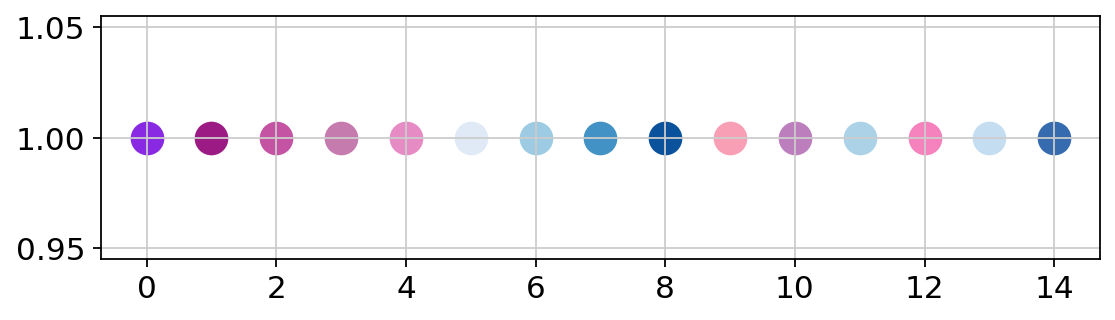

In [10]:
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Tcell)):
    plt.scatter(i, 1, c=sc_color_Tcell[i], s=200)
plt.show()

# 动态调控分析

In [11]:
adata_new.obs['T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2         CD8.MAIT
AAACGGGAGGCGCTCT-1-HP_POS_2           CD8.RM
AAAGATGAGGCATGGT-1-HP_POS_2    CD8.Exhausted
AAAGATGTCCCAAGTA-1-HP_POS_2           CD8.EM
AAAGCAAAGCTAGCCC-1-HP_POS_2           CD8.RM
                                   ...      
TTTCCTCCAATAGCGG-1-HP_POS_7         CD8.MAIT
TTTCCTCTCATGCTCC-1-HP_POS_7    CD8.Exhausted
TTTGGTTAGGATGGTC-1-HP_POS_7           CD8.RM
TTTGGTTGTCAGCTAT-1-HP_POS_7    CD8.Exhausted
TTTGGTTGTTGCCTCT-1-HP_POS_7           CD8.RM
Name: T/NK_celltype, Length: 5011, dtype: category
Categories (5, object): ['CD8.EM', 'CD8.Early_Activated', 'CD8.Exhausted', 'CD8.MAIT', 'CD8.RM']

In [12]:
adata_new = adata_new[adata_new.obs['T/NK_celltype']!='CD8.RM']
adata_new = adata_new[adata_new.obs['T/NK_celltype']!='CD8.EM']
adata_new = adata_new[adata_new.obs['T/NK_celltype']!='CD8.Early_Activated']
adata_new

View of AnnData object with n_obs × n_vars = 1024 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [13]:
!pip install pyVIA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scltnn 0.0.9 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [14]:
from pyVIA.core import *
import pyVIA.datasets_via as datasets_via
#from core_working_ import *
import pandas as pd
import umap
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/phate/__init__.py


In [15]:
sc.pp.neighbors(adata_new, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_new)
sc.tl.paga(adata_new)
sc.pl.paga(adata_new, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_new,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


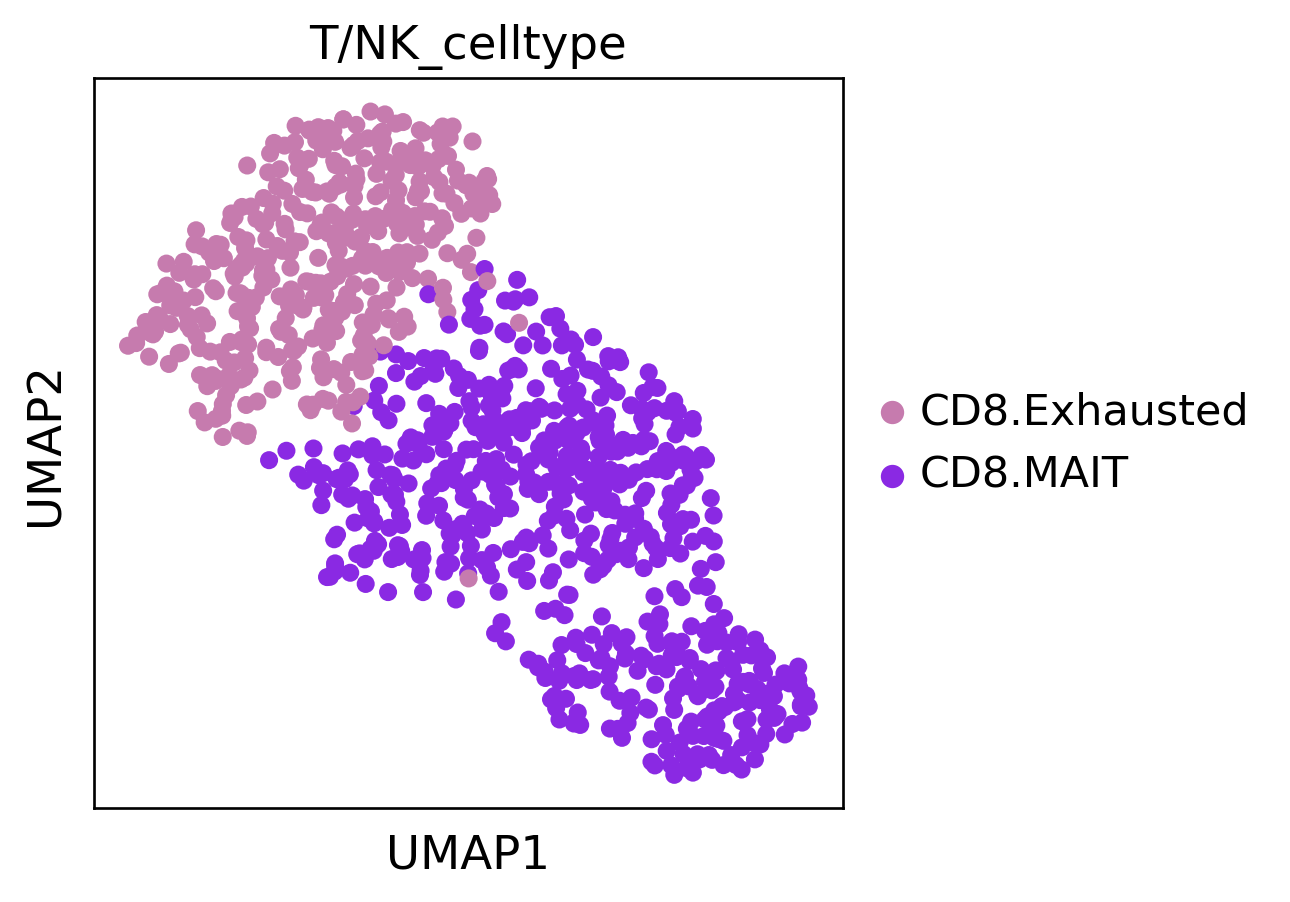

In [16]:
sc.pl.umap(adata_new,color=['T/NK_celltype'])

In [17]:
tsnem = adata_new.obsm['X_umap']
# 细胞类型标签
true_label = adata_new.obs['T/NK_celltype'].tolist()
# Umap标签
embedding = adata_new.obsm['X_umap']

#define parameters
ncomps, knn, random_seed, dataset, root_user  =30,20, 0,'T/NK_celltype', ['CD8.Exhausted']

v0 = VIA(adata_new.obsm['X_scVI'][:, 0:ncomps], 
         true_label,   # 细胞类型标签
         jac_std_global=0.5, #控制集群的细粒度。范围0-1是合理的。值接近0将导致更多且更小的集群
         dist_std_local=1, 
         knn=knn,  # 图的最近邻的已知数
         cluster_graph_pruning_std=0.15, 
         too_big_factor=0.3, # 超过整个细胞群体30%的亚群将被重新聚类。值0.1-0.3运行良好
         root_user=root_user, # 起始细胞
         preserve_disconnected=True, # 尝试链接起由于剪枝带来的碎片，如果轨迹存在断裂情况，设置为Fasle
         dataset='group', # Group ID，会基于提供的 root_user 参数的类型进行设置
         random_seed=random_seed,#
         edgebundle_pruning_twice=True, # 设置为True，表明进一步的视觉修剪
         
         )#, piegraph_arrow_head_width=0.2,             piegraph_edgeweight_scalingfactor=1.0)  
v0.run_VIA()

2023-02-13 01:57:44.444497	Running VIA over input data of 1024 (samples) x 30 (features)
2023-02-13 01:57:44.444612	Knngraph has 20 neighbors
2023-02-13 01:57:45.571369	Finished global pruning of 20-knn graph used for clustering at level of 0.5. Kept 65.0 % of edges. 
2023-02-13 01:57:45.584675	Number of connected components used for clustergraph  is 1
2023-02-13 01:57:45.661930	Commencing community detection
2023-02-13 01:57:45.699955	Finished running Leiden algorithm. Found 9 clusters.
2023-02-13 01:57:45.702763	Merging 0 very small clusters (<10)
2023-02-13 01:57:45.704117	Finished detecting communities. Found 9 communities
2023-02-13 01:57:45.706121	Making cluster graph. Global cluster graph pruning level: 0.15
2023-02-13 01:57:45.713482	Graph has 1 connected components before pruning
2023-02-13 01:57:45.716475	Graph has 1 connected components before pruning
2023-02-13 01:57:45.718170	0.0% links trimmed from local pruning relative to start
2023-02-13 01:57:45.718859	69.7% links tri

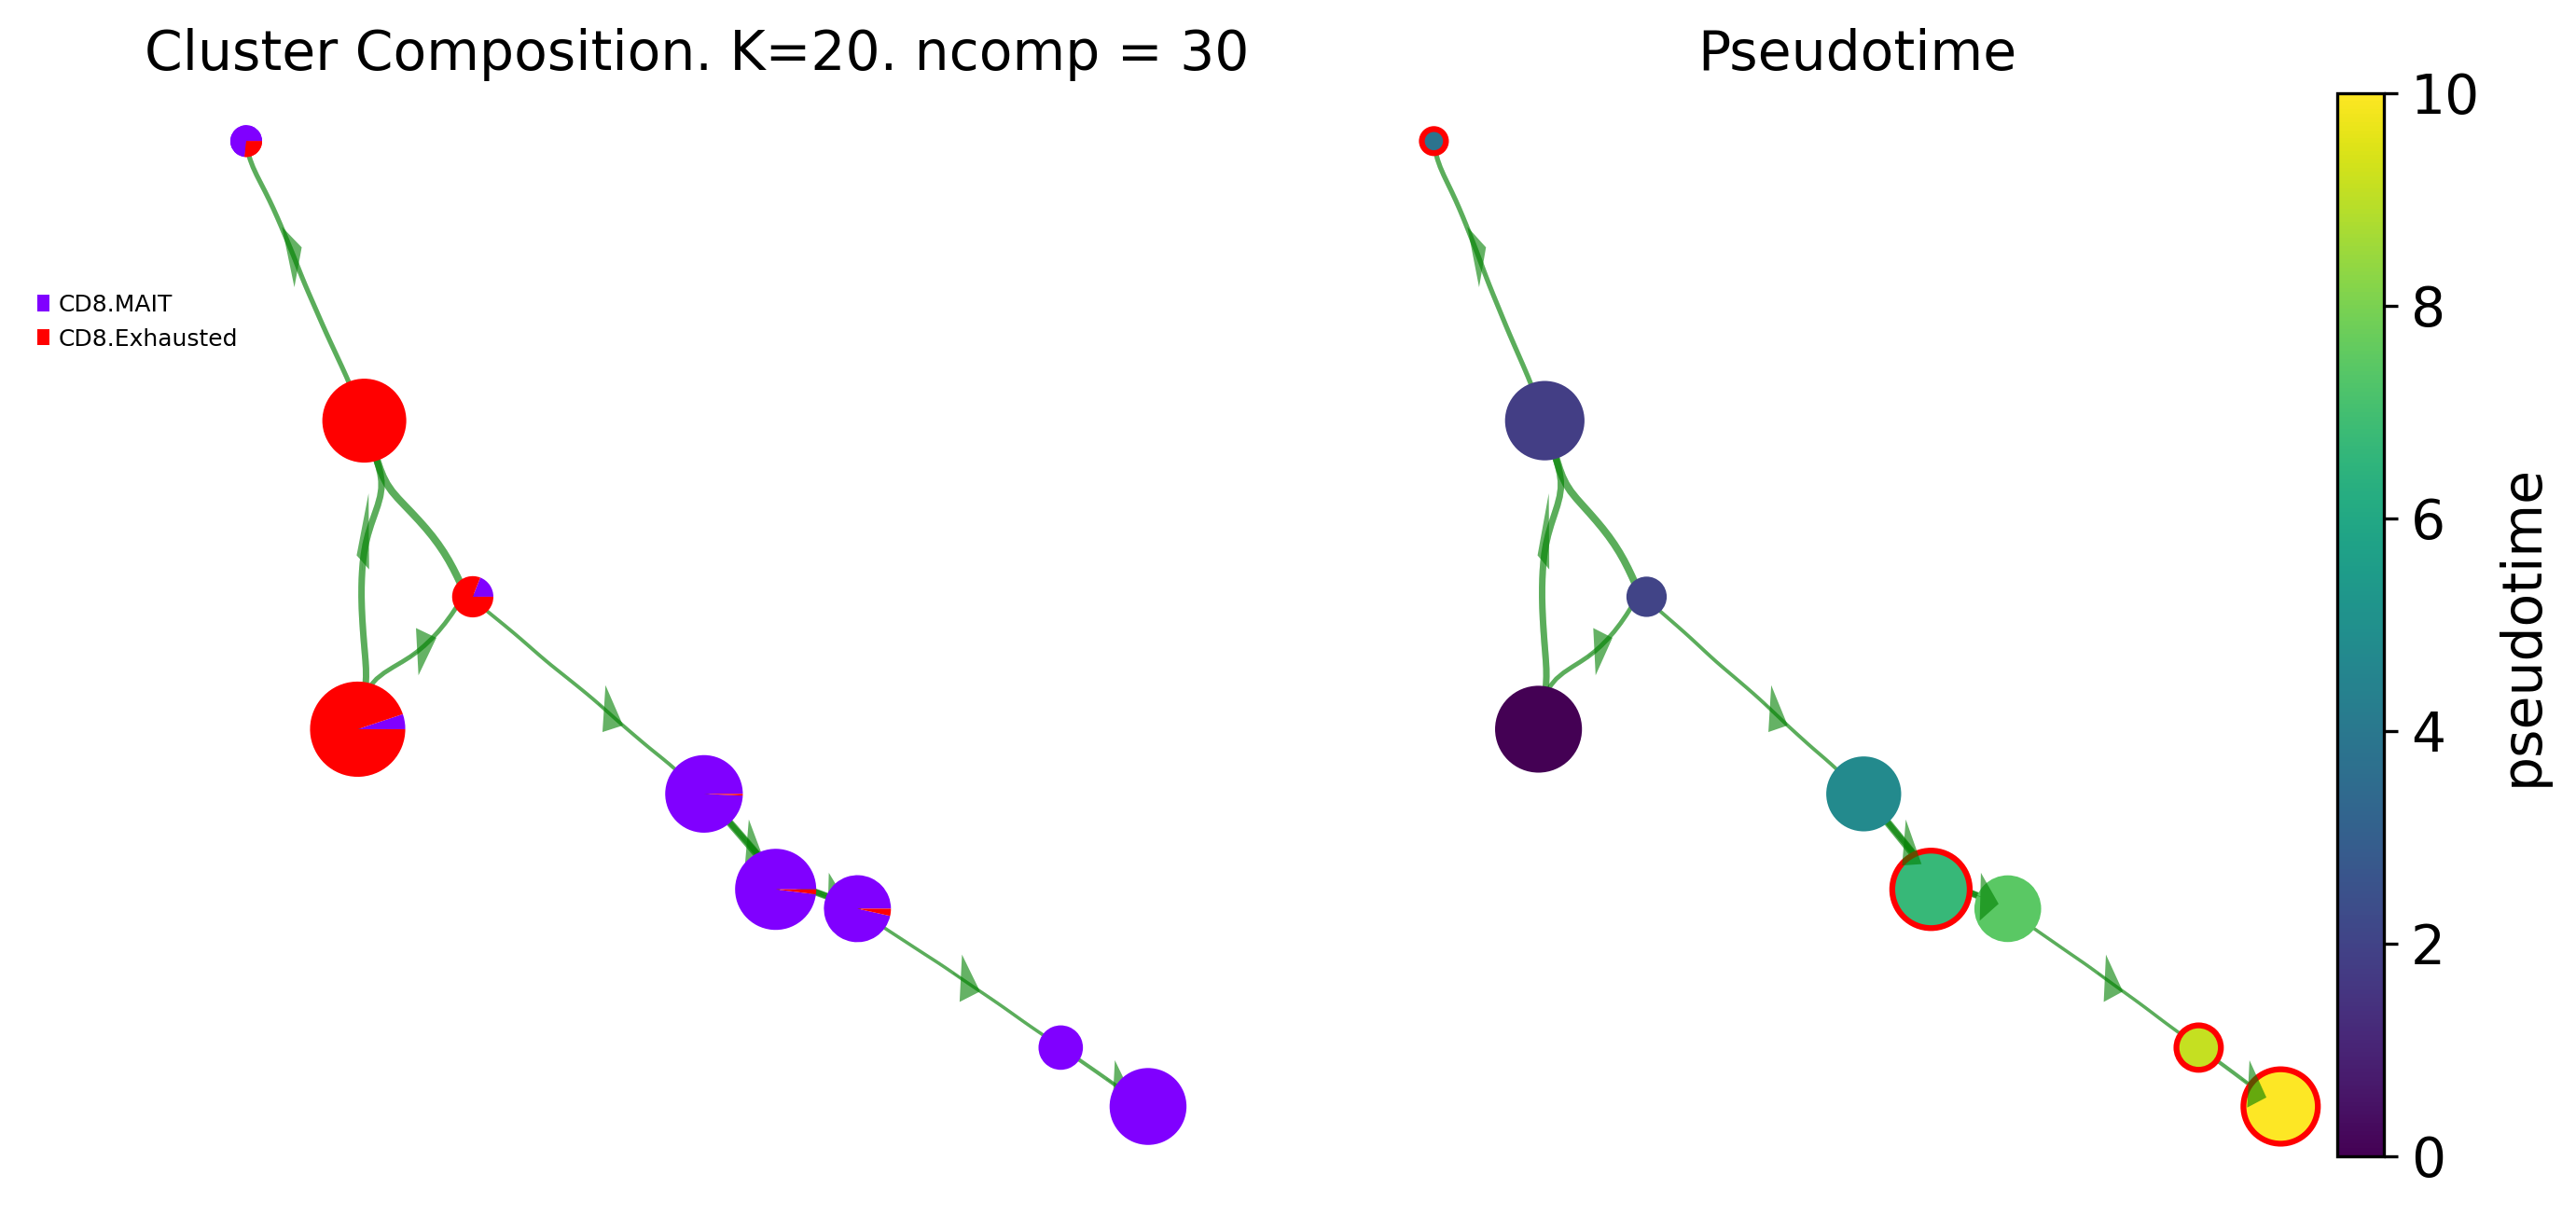

In [18]:
# VIA graph 
# 细胞组成图和伪时序图

fig, ax, ax2= draw_piechart_graph(via0=v0, 
                  type_data='pt', # 可选择‘pt'(可视化伪时序). or ‘gene’
                  title='', #
                  cmap='viridis', # 颜色
                  ax_text=False, # 如果不需要细胞类型标签可以选择False(别选True，太辣眼睛了)
                  gene_exp='', # 如果需要绘制基因强度，可以在输入基因名
                  alpha_edge=0.4,  # 不知道有啥用
                  linewidth_edge=1.5,  # 设置线的宽度
                  edge_color='green',  # 设置线的颜色 
                  headwidth_arrow=0.08, # 设置箭头大小
                  )
fig.set_size_inches(10,5)
#plt.savefig("Figure3_VIA.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_VIA.png",dpi=300,bbox_inches = 'tight')

In [19]:
dir(v0)

['A_velo',
 'CSM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_make_csrmatrix_noselfloop',
 '_velocity_embedding',
 'accuracy',
 'alpha_teleport',
 'cluster_graph_csr_not_pruned',
 'cluster_graph_pruning_std',
 'cluster_population_dict',
 'color_dict',
 'compute_hitting_time',
 'compute_hitting_time_onbias',
 'connected_comp_labels',
 'csr_array_locally_pruned',
 'csr_array_locally_pruned_augmented',
 'csr_full_graph',
 'data',
 'dataset',
 'df_annot',
 'dict_terminal_super_sub_pairs',
 'dist_std_local',
 'distance',
 'do_compute_embedding',
 'do_impute',
 'draw_piechart_graph',
 'draw_piechart_graph_nobundle',
 'edgebundle_pruning',
 'edgebundle_pruning_twice',


In [20]:
v0.single_cell_pt_markov

array([0.743, 0.183, 0.743, ..., 0.743, 0.196, 0.676])

In [21]:
adata_new.obs['dpt'] = ''
adata_new.obs['dpt'] = v0.single_cell_pt_markov

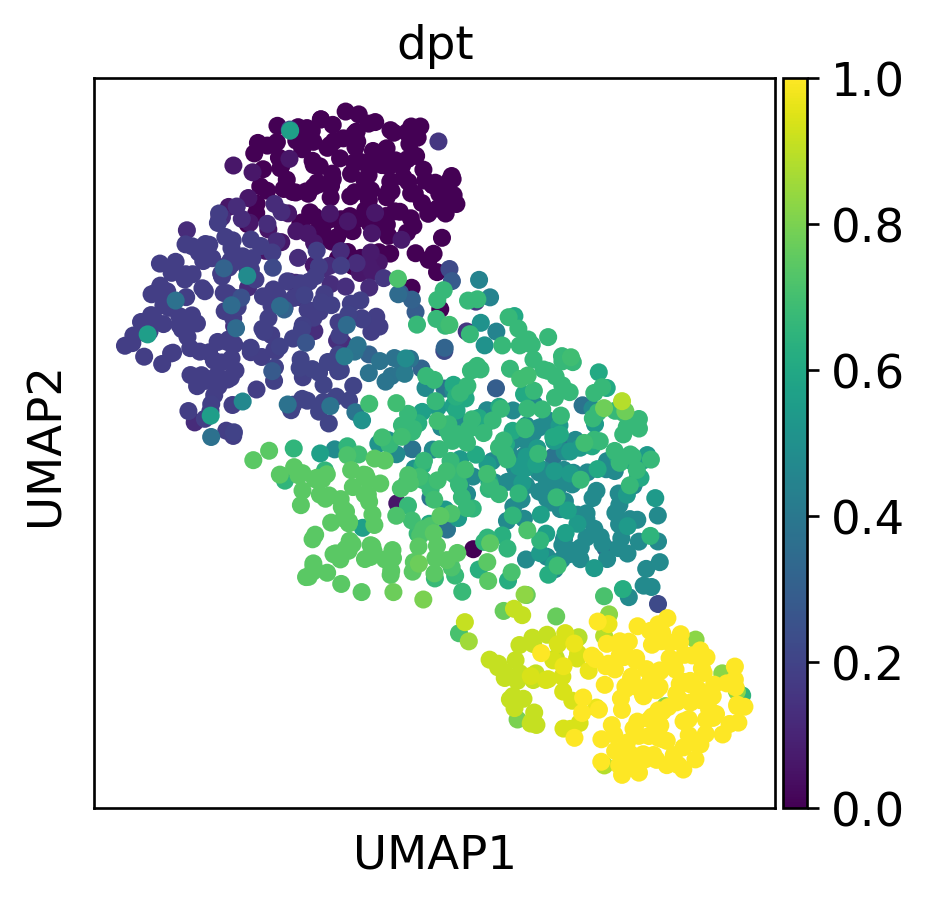

In [22]:
sc.pl.umap(adata_new,color=['dpt'])

# scltnn 

In [23]:
!pip install scvelo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52040 sha256=7780fcb909d79666678d12e6469379f8bd7fc470346e9098e0aadb35b87071d1
  Stored in directory: /root/.cache/pip/wheels/51/a8/38/34cd3ac301d305904452deca6780940beb70d059798042fd63
Successfully built loompy


In [24]:
import scvelo as scv
import scltnn
import scanpy as sc
import anndata

In [25]:
from scipy.sparse import csr_matrix
adata_new.X = csr_matrix(adata_new.X)

In [26]:
adata_new.obs

Person Sample  n_genes  doublet_score  \
AAACCTGTCTAACTTC-1-HP_POS_2  HP_POS_2    POS     3252       0.015161   
AAAGATGAGGCATGGT-1-HP_POS_2  HP_POS_2    POS     3372       0.009850   
AAATGCCAGTGGTAAT-1-HP_POS_2  HP_POS_2    POS     2181       0.034524   
AACTCCCTCTGTCTAT-1-HP_POS_2  HP_POS_2    POS     2830       0.008553   
AAGGCAGAGGAGTTGC-1-HP_POS_2  HP_POS_2    POS     2177       0.020984   
...                               ...    ...      ...            ...   
TTCTTAGTCATGCTCC-1-HP_POS_7  HP_POS_7    POS     1765       0.024783   
TTTATGCTCGATGAGG-1-HP_POS_7  HP_POS_7    POS     1436       0.018250   
TTTCCTCCAATAGCGG-1-HP_POS_7  HP_POS_7    POS     1228       0.033851   
TTTCCTCTCATGCTCC-1-HP_POS_7  HP_POS_7    POS     1722       0.042611   
TTTGGTTGTCAGCTAT-1-HP_POS_7  HP_POS_7    POS     1364       0.026018   

                             predicted_doublet  n_genes_by_counts  \
AAACCTGTCTAACTTC-1-HP_POS_2              False               3252   
AAAGATGAGGCATGGT-1-HP_POS_2              False               3372   
AAATGCCAGTGGTAAT-1-HP_POS_2              False               2181   
AACTCCCTCTGTCTAT-1-HP_POS_2              False               2830   
AAGGCAGAGGAGTTGC-1-HP_POS_2              False               2177   
...                                        ...                ...   
TTCTTAGTCATGCTCC-1-HP_POS_7              False               1765   
TTTATGCTCGATGAGG-1-HP_POS_7              False               1436   
TTTCCTCCAATAGCGG-1-HP_POS_7              False               1228   
TTTCCTCTCATGCTCC-1-HP_POS_7              False               1722   
TTTGGTTGTCAGCTAT-1-HP_POS_7              False               1364   

                             total_counts  total_counts_mt  pct_counts_mt  \
AAACCTGTCTAACTTC-1-HP_POS_2       10150.0            451.0       4.443350   
AAAGATGAGGCATGGT-1-HP_POS_2       10124.0            416.0       4.109048   
AAATGCCAGTGGTAAT-1-HP_POS_2        5204.0            756.0      14.527287   
AACTCCCTCTGTCTAT-1-HP_POS_2        7157.0            243.0       3.395277   
AAGGCAGAGGAGTTGC-1-HP_POS_2        4481.0            154.0       3.436733   
...                                   ...              ...            ...   
TTCTTAGTCATGCTCC-1-HP_POS_7        3773.0            164.0       4.346673   
TTTATGCTCGATGAGG-1-HP_POS_7        3422.0            179.0       5.230859   
TTTCCTCCAATAGCGG-1-HP_POS_7        2652.0             73.0       2.752640   
TTTCCTCTCATGCTCC-1-HP_POS_7        4073.0            172.0       4.222931   
TTTGGTTGTCAGCTAT-1-HP_POS_7        2691.0             83.0       3.084355   

                             _scvi_batch  _scvi_labels leiden major_celltype  \
AAACCTGTCTAACTTC-1-HP_POS_2            1             0      4      NK/T cell   
AAAGATGAGGCATGGT-1-HP_POS_2            1             0      3      NK/T cell   
AAATGCCAGTGGTAAT-1-HP_POS_2            1             0      4      NK/T cell   
AACTCCCTCTGTCTAT-1-HP_POS_2            1             0      3      NK/T cell   
AAGGCAGAGGAGTTGC-1-HP_POS_2            1             0      3      NK/T cell   
...                                  ...           ...    ...            ...   
TTCTTAGTCATGCTCC-1-HP_POS_7            6             0      4      NK/T cell   
TTTATGCTCGATGAGG-1-HP_POS_7            6             0      6      NK/T cell   
TTTCCTCCAATAGCGG-1-HP_POS_7            6             0      4      NK/T cell   
TTTCCTCTCATGCTCC-1-HP_POS_7            6             0      3      NK/T cell   
TTTGGTTGTCAGCTAT-1-HP_POS_7            6             0      4      NK/T cell   

                             T/NK_celltype T/NK_type       dpt  
AAACCTGTCTAACTTC-1-HP_POS_2       CD8.MAIT       CD8  0.743204  
AAAGATGAGGCATGGT-1-HP_POS_2  CD8.Exhausted       CD8  0.182694  
AAATGCCAGTGGTAAT-1-HP_POS_2       CD8.MAIT       CD8  0.743204  
AACTCCCTCTGTCTAT-1-HP_POS_2  CD8.Exhausted       CD8  0.182694  
AAGGCAGAGGAGTTGC-1-HP_POS_2  CD8.Exhausted       CD8  0.182694  
...                                    ...       ...       ..

In [27]:
adata.to_df()

A2M     ABCA8     ABCC2    ABI3BP  \
AAACCTGTCTAACTTC-1-HP_POS_2 -0.196394 -0.097554 -0.116536 -0.118058   
AAACGGGAGGCGCTCT-1-HP_POS_2 -0.203085 -0.099800 -0.087179 -0.126911   
AAACGGGTCGATAGAA-1-HP_POS_2 -0.229493 -0.111179 -0.020806 -0.133079   
AAAGATGAGGCATGGT-1-HP_POS_2 -0.199012 -0.098654 -0.109402 -0.118992   
AAAGATGCAGGCTCAC-1-HP_POS_2 -0.201308 -0.100249 -0.115565 -0.112590   
...                               ...       ...       ...       ...   
TTCGAAGCACTCAGGC-1-HP_NEG_2 -0.225574 -0.109149 -0.023927 -0.136075   
TTCTTAGTCAACCATG-1-HP_NEG_2 -0.216200 -0.105508 -0.055338 -0.129322   
TTGCCGTAGAATTCCC-1-HP_NEG_2 -0.197563 -0.097616 -0.104886 -0.123395   
TTGCGTCGTTCGCTAA-1-HP_NEG_2 -0.225511 -0.109209 -0.025805 -0.135060   
TTGGCAATCTGCGGCA-1-HP_NEG_2 -0.170740 -0.086394 -0.178925 -0.113281   

                             AC000120.1  AC002091.1  AC002094.4  AC002398.2  \
AAACCTGTCTAACTTC-1-HP_POS_2   -0.009962   -0.021322   -0.015755   -0.064651   
AAACGGGAGGCGCTCT-1-HP_POS_2   -0.011682   -0.025575   -0.018697   -0.067023   
AAACGGGTCGATAGAA-1-HP_POS_2   -0.007277   -0.029643   -0.016027   -0.074418   
AAAGATGAGGCATGGT-1-HP_POS_2   -0.009651   -0.021868   -0.015650   -0.065407   
AAAGATGCAGGCTCAC-1-HP_POS_2   -0.006569   -0.019156   -0.011975   -0.065576   
...                                 ...         ...         ...         ...   
TTCGAAGCACTCAGGC-1-HP_NEG_2   -0.009452   -0.030768   -0.018364   -0.073588   
TTCTTAGTCAACCATG-1-HP_NEG_2   -0.009240   -0.027307   -0.017047   -0.070651   
TTGCCGTAGAATTCCC-1-HP_NEG_2   -0.011737   -0.023740   -0.018150   -0.065325   
TTGCGTCGTTCGCTAA-1-HP_NEG_2   -0.009073   -0.030316   -0.017874   -0.073502   
TTGGCAATCTGCGGCA-1-HP_NEG_2   -0.014713   -0.017906   -0.018951   -0.057550   

                             AC002511.1  AC003965.1  ...  Z94057.1  Z99289.3  \
AAACCTGTCTAACTTC-1-HP_POS_2   -0.048622   -0.015508  ... -0.021486 -0.006812   
AAACGGGAGGCGCTCT-1-HP_POS_2   -0.056903   -0.017045  ... -0.009245 -0.006877   
AAACGGGTCGATAGAA-1-HP_POS_2   -0.056703   -0.018552  ... -0.017007 -0.002404   
AAAGATGAGGCATGGT-1-HP_POS_2   -0.048971   -0.015709  ... -0.021627 -0.006422   
AAAGATGCAGGCTCAC-1-HP_POS_2   -0.041025   -0.014740  ... -0.035820 -0.004892   
...                                 ...         ...  ...       ...       ...   
TTCGAAGCACTCAGGC-1-HP_NEG_2   -0.061202   -0.018948  ... -0.008235 -0.003711   
TTCTTAGTCAACCATG-1-HP_NEG_2   -0.056058   -0.017690  ... -0.014372 -0.004548   
TTGCCGTAGAATTCCC-1-HP_NEG_2   -0.054401   -0.016378  ... -0.011961 -0.007446   
TTGCGTCGTTCGCTAA-1-HP_NEG_2   -0.060060   -0.018786  ... -0.010165 -0.003557   
TTGGCAATCTGCGGCA-1-HP_NEG_2   -0.050204   -0.014237  ... -0.011579 -0.011357   

                                 ZBBX   ZCCHC12   ZDHHC19   ZDHHC22      ZG16  \
AAACCTGTCTAACTTC-1-HP_POS_2 -0.009265 -0.037408 -0.027670 -0.010598 -0.168750   
AAACGGGAGGCGCTCT-1-HP_POS_2 -0.006423 -0.042791 -0.037039 -0.016439 -0.082341   
AAACGGGTCGATAGAA-1-HP_POS_2 -0.008886 -0.049225 -0.039191 -0.012057  3.500091   
AAAGATGAGGCATGGT-1-HP_POS_2 -0.009356 -0.038212 -0.028274 -0.010471 -0.158082   
AAAGATGCAGGCTCAC-1-HP_POS_2 -0.012867 -0.035200 -0.020065 -0.003476 -0.214772   
...                               ...       ...       ...       ...       ...   
TTCGAAGCACTCAGGC-1-HP_NEG_2 -0.006662 -0.050284 -0.043604 -0.016436  0.019719   
TTCTTAGTCAACCATG-1-HP_NEG_2 -0.007957 -0.045650 -0.037318 -0.013640 -0.049653   
TTGCCGTAGAATTCCC-1-HP_NEG_2 -0.006967 -0.040300 -0.033895 -0.015232 -0.118980   
TTGCGTCGTTCGCTAA-1-HP_NEG_2 -0.007132 -0.049754 -0.042389 -0.015492  0.010387   
TTGGCAATCTGCGGCA-1-HP_NEG_2 -0.006295 -0.031782 -0.027050 -0.016012 -0.233257   

                               ZNF165  ZNF197-AS1    ZNF683  
AAACCTGTCTAACTTC-1-HP_POS_2 -0.211749   -0.011839 -0.137918  
AAACGGGAGGCGCTCT-1-HP_POS_2 -0.231228   -0.015203 -0.182869  
AAACGGGTCGATAGAA-1-HP_POS_2 -0.173528   -0.014383 -0.195915  
AAAGATGAGGCATGGT-1-HP_POS_2 -0.207539   -0.011916 

In [28]:
adata_new = adata_new.raw.to_adata()
adata_new.obs['LTNN_time_r'] = ''
adata_new.obs['LTNN_time_r'] = adata_new.obs['dpt']

In [29]:
adata_new

AnnData object with n_obs × n_vars = 1024 × 26265
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type', 'dpt', 'LTNN_time_r'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [30]:
import seaborn as sns
LTNN_time_Pearson,adata_1=scltnn.utils.find_high_correlation_gene(adata_new,rev=True)
top_genes = ['KLRB1','RORA','NCR3','ZBTB16','SLC4A10',]
LTNN_time_Pearson = LTNN_time_Pearson[LTNN_time_Pearson['feature'].isin(top_genes)]
LTNN_time_Pearson

correlation  feature  abs_correlation sig
NCR3        0.545803     NCR3         0.545803   +
SLC4A10     0.471576  SLC4A10         0.471576   +
ZBTB16      0.219366   ZBTB16         0.219366   +
KLRB1       0.146127    KLRB1         0.146127   +
RORA        0.141236     RORA         0.141236   +

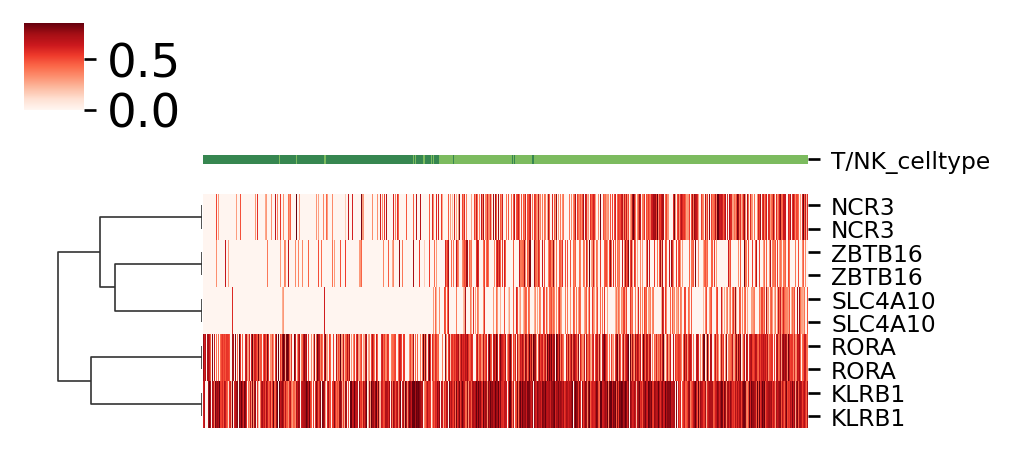

In [31]:
import seaborn as sns
scltnn.plot.plot_high_correlation_heatmap(adata_1,LTNN_time_Pearson,fontsize=7,standard_scale=0,
                              meta=['T/NK_celltype'],figsize=(5,2),number=30,cmap='Reds',
                             meta_legend=True,meta_legend_kws={'ncol':2,'distance':20,'interval':3})
#plt.savefig('heatmap_mouse.png',dpi=300,bbox_inches = 'tight')

In [32]:
top_genes = ['KLRB1','RORA','NCR3','ZBTB16','SLC4A10',]
df = adata_new.to_df()
df 

A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1  A2ML1-AS1  \
AAACCTGTCTAACTTC-1-HP_POS_2   0.0  0.000000   0.0  0.0      0.0        0.0   
AAAGATGAGGCATGGT-1-HP_POS_2   0.0  0.000000   0.0  0.0      0.0        0.0   
AAATGCCAGTGGTAAT-1-HP_POS_2   0.0  0.000000   0.0  0.0      0.0        0.0   
AACTCCCTCTGTCTAT-1-HP_POS_2   0.0  0.000000   0.0  0.0      0.0        0.0   
AAGGCAGAGGAGTTGC-1-HP_POS_2   0.0  0.000000   0.0  0.0      0.0        0.0   
...                           ...       ...   ...  ...      ...        ...   
TTCTTAGTCATGCTCC-1-HP_POS_7   0.0  0.000000   0.0  0.0      0.0        0.0   
TTTATGCTCGATGAGG-1-HP_POS_7   0.0  1.366670   0.0  0.0      0.0        0.0   
TTTCCTCCAATAGCGG-1-HP_POS_7   0.0  1.562501   0.0  0.0      0.0        0.0   
TTTCCTCTCATGCTCC-1-HP_POS_7   0.0  0.000000   0.0  0.0      0.0        0.0   
TTTGGTTGTCAGCTAT-1-HP_POS_7   0.0  0.000000   0.0  0.0      0.0        0.0   

                             A3GALT2  A4GALT  A4GNT      AAAS  ...      ZW10  \
AAACCTGTCTAACTTC-1-HP_POS_2      0.0     0.0    0.0  0.000000  ...  0.000000   
AAAGATGAGGCATGGT-1-HP_POS_2      0.0     0.0    0.0  1.090413  ...  0.000000   
AAATGCCAGTGGTAAT-1-HP_POS_2      0.0     0.0    0.0  0.000000  ...  1.072131   
AACTCCCTCTGTCTAT-1-HP_POS_2      0.0     0.0    0.0  0.000000  ...  0.000000   
AAGGCAGAGGAGTTGC-1-HP_POS_2      0.0     0.0    0.0  1.172991  ...  0.000000   
...                              ...     ...    ...       ...  ...       ...   
TTCTTAGTCATGCTCC-1-HP_POS_7      0.0     0.0    0.0  0.000000  ...  0.000000   
TTTATGCTCGATGAGG-1-HP_POS_7      0.0     0.0    0.0  0.000000  ...  0.000000   
TTTCCTCCAATAGCGG-1-HP_POS_7      0.0     0.0    0.0  0.000000  ...  0.000000   
TTTCCTCTCATGCTCC-1-HP_POS_7      0.0     0.0    0.0  0.000000  ...  0.000000   
TTTGGTTGTCAGCTAT-1-HP_POS_7      0.0     0.0    0.0  0.000000  ...  0.000000   

                             ZWILCH  ZWINT  ZXDA  ZXDB      ZXDC  ZYG11A  \
AAACCTGTCTAACTTC-1-HP_POS_2     0.0    0.0   0.0   0.0  0.000000     0.0   
AAAGATGAGGCATGGT-1-HP_POS_2     0.0    0.0   0.0   0.0  0.687004     0.0   
AAATGCCAGTGGTAAT-1-HP_POS_2     0.0    0.0   0.0   0.0  0.000000     0.0   
AACTCCCTCTGTCTAT-1-HP_POS_2     0.0    0.0   0.0   0.0  0.000000     0.0   
AAGGCAGAGGAGTTGC-1-HP_POS_2     0.0    0.0   0.0   0.0  0.000000     0.0   
...                             ...    ...   ...   ...       ...     ...   
TTCTTAGTCATGCTCC-1-HP_POS_7     0.0    0.0   0.0   0.0  0.000000     0.0   
TTTATGCTCGATGAGG-1-HP_POS_7     0.0    0.0   0.0   0.0  0.000000     0.0   
TTTCCTCCAATAGCGG-1-HP_POS_7     0.0    0.0   0.0   0.0  0.000000     0.0   
TTTCCTCTCATGCTCC-1-HP_POS_7     0.0    0.0   0.0   0.0  0.000000     0.0   
TTTGGTTGTCAGCTAT-1-HP_POS_7     0.0    0.0   0.0   0.0  0.000000     0.0   

                              ZYG11B       ZYX     ZZEF1  
AAACCTGTCTAACTTC-1-HP_POS_2  0.00000  1.779368  0.000000  
AAAGATGAGGCATGGT-1-HP_POS_2  0.00000  1.599591  0.000000  
AAATGCCAGTGGTAAT-1-HP_POS_2  0.00000  0.000000  1.072131  
AACTCCCTCTGTCTAT-1-HP_POS_2  0.00000  0.874315  1.333544  
AAGGCAGAGGAGTTGC-1-HP_POS_2  0.00000  0.000000  0.000000  
...                              ...       ...       ...  
TTCTTAGTCATGCTCC-1-HP_POS_7  0.00000  0.000000  0.000000  
TTTATGCTCGATGAGG-1-HP_POS_7  1.36667  0.000000  0.000000  
TTTCCTCCAATAGCGG-1-HP_POS_7  0.00000  0.000000  0.000000  
TTTCCTCTCATGCTCC-1-HP_POS_7  0.00000  1.239878  0.000000  
TTTGGTTGTCAGCTAT-1-HP_POS_7  1.55098  0.000000  0.000000  

[1024 rows x 26265 columns]

In [33]:
adata_new.obs

Person Sample  n_genes  doublet_score  \
AAACCTGTCTAACTTC-1-HP_POS_2  HP_POS_2    POS     3252       0.015161   
AAAGATGAGGCATGGT-1-HP_POS_2  HP_POS_2    POS     3372       0.009850   
AAATGCCAGTGGTAAT-1-HP_POS_2  HP_POS_2    POS     2181       0.034524   
AACTCCCTCTGTCTAT-1-HP_POS_2  HP_POS_2    POS     2830       0.008553   
AAGGCAGAGGAGTTGC-1-HP_POS_2  HP_POS_2    POS     2177       0.020984   
...                               ...    ...      ...            ...   
TTCTTAGTCATGCTCC-1-HP_POS_7  HP_POS_7    POS     1765       0.024783   
TTTATGCTCGATGAGG-1-HP_POS_7  HP_POS_7    POS     1436       0.018250   
TTTCCTCCAATAGCGG-1-HP_POS_7  HP_POS_7    POS     1228       0.033851   
TTTCCTCTCATGCTCC-1-HP_POS_7  HP_POS_7    POS     1722       0.042611   
TTTGGTTGTCAGCTAT-1-HP_POS_7  HP_POS_7    POS     1364       0.026018   

                             predicted_doublet  n_genes_by_counts  \
AAACCTGTCTAACTTC-1-HP_POS_2              False               3252   
AAAGATGAGGCATGGT-1-HP_POS_2              False               3372   
AAATGCCAGTGGTAAT-1-HP_POS_2              False               2181   
AACTCCCTCTGTCTAT-1-HP_POS_2              False               2830   
AAGGCAGAGGAGTTGC-1-HP_POS_2              False               2177   
...                                        ...                ...   
TTCTTAGTCATGCTCC-1-HP_POS_7              False               1765   
TTTATGCTCGATGAGG-1-HP_POS_7              False               1436   
TTTCCTCCAATAGCGG-1-HP_POS_7              False               1228   
TTTCCTCTCATGCTCC-1-HP_POS_7              False               1722   
TTTGGTTGTCAGCTAT-1-HP_POS_7              False               1364   

                             total_counts  total_counts_mt  pct_counts_mt  \
AAACCTGTCTAACTTC-1-HP_POS_2       10150.0            451.0       4.443350   
AAAGATGAGGCATGGT-1-HP_POS_2       10124.0            416.0       4.109048   
AAATGCCAGTGGTAAT-1-HP_POS_2        5204.0            756.0      14.527287   
AACTCCCTCTGTCTAT-1-HP_POS_2        7157.0            243.0       3.395277   
AAGGCAGAGGAGTTGC-1-HP_POS_2        4481.0            154.0       3.436733   
...                                   ...              ...            ...   
TTCTTAGTCATGCTCC-1-HP_POS_7        3773.0            164.0       4.346673   
TTTATGCTCGATGAGG-1-HP_POS_7        3422.0            179.0       5.230859   
TTTCCTCCAATAGCGG-1-HP_POS_7        2652.0             73.0       2.752640   
TTTCCTCTCATGCTCC-1-HP_POS_7        4073.0            172.0       4.222931   
TTTGGTTGTCAGCTAT-1-HP_POS_7        2691.0             83.0       3.084355   

                             _scvi_batch  _scvi_labels leiden major_celltype  \
AAACCTGTCTAACTTC-1-HP_POS_2            1             0      4      NK/T cell   
AAAGATGAGGCATGGT-1-HP_POS_2            1             0      3      NK/T cell   
AAATGCCAGTGGTAAT-1-HP_POS_2            1             0      4      NK/T cell   
AACTCCCTCTGTCTAT-1-HP_POS_2            1             0      3      NK/T cell   
AAGGCAGAGGAGTTGC-1-HP_POS_2            1             0      3      NK/T cell   
...                                  ...           ...    ...            ...   
TTCTTAGTCATGCTCC-1-HP_POS_7            6             0      4      NK/T cell   
TTTATGCTCGATGAGG-1-HP_POS_7            6             0      6      NK/T cell   
TTTCCTCCAATAGCGG-1-HP_POS_7            6             0      4      NK/T cell   
TTTCCTCTCATGCTCC-1-HP_POS_7            6             0      3      NK/T cell   
TTTGGTTGTCAGCTAT-1-HP_POS_7            6             0      4      NK/T cell   

                             T/NK_celltype T/NK_type       dpt  LTNN_time_r  \
AAACCTGTCTAACTTC-1-HP_POS_2       CD8.MAIT       CD8  0.743204     0.743204   
AAAGATGAGGCATGGT-1-HP_POS_2  CD8.Exhausted       CD8  0.182694     0.182694   
AAATGCCAGTGGTAAT-1-HP_POS_2       CD8.MAIT       CD8  0.743204     0.743204   
AACTCCCTCTGTCTAT-1-HP_POS_2  CD8.Exhausted       CD8  0.182694     0.182694   
AAGGCAGAGGAGTTGC-1-HP_POS_2  CD8.Exhausted       CD8  0.

In [34]:
j=0
for i in top_genes:
  adata_new.obs[i] = ''
  adata_new.obs[i] = df.iloc[:,j]
  j=j+1

In [35]:
adata_new.obs['T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2         CD8.MAIT
AAAGATGAGGCATGGT-1-HP_POS_2    CD8.Exhausted
AAATGCCAGTGGTAAT-1-HP_POS_2         CD8.MAIT
AACTCCCTCTGTCTAT-1-HP_POS_2    CD8.Exhausted
AAGGCAGAGGAGTTGC-1-HP_POS_2    CD8.Exhausted
                                   ...      
TTCTTAGTCATGCTCC-1-HP_POS_7         CD8.MAIT
TTTATGCTCGATGAGG-1-HP_POS_7    CD8.Exhausted
TTTCCTCCAATAGCGG-1-HP_POS_7         CD8.MAIT
TTTCCTCTCATGCTCC-1-HP_POS_7    CD8.Exhausted
TTTGGTTGTCAGCTAT-1-HP_POS_7    CD8.Exhausted
Name: T/NK_celltype, Length: 1024, dtype: category
Categories (2, object): ['CD8.Exhausted', 'CD8.MAIT']

# 箱线图

In [ ]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [ ]:
import random
import matplotlib.patches as mpatches

data = adata_new.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='dpt'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

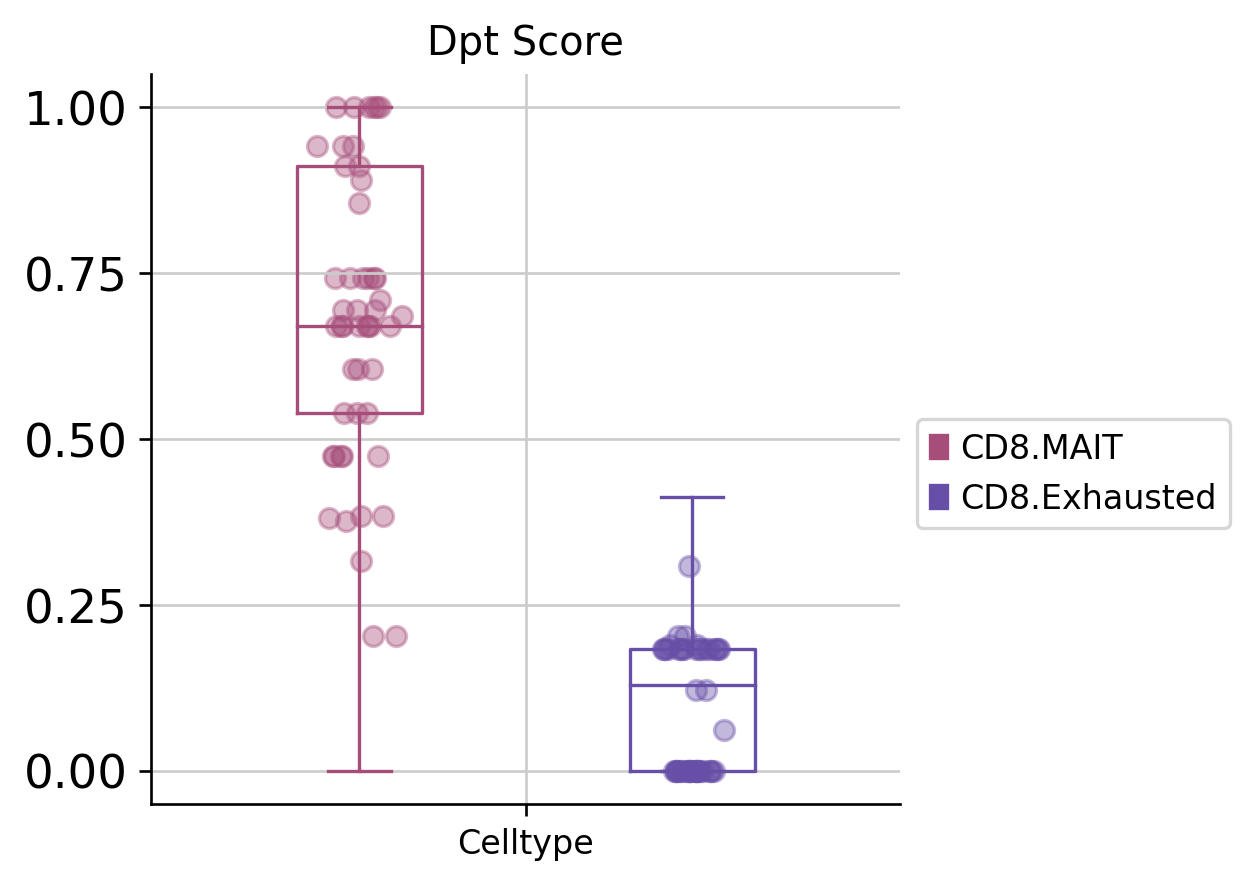

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#a64d79','#674ea7']
#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data][0], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
#ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)

y = np.arange(0, 1.25, 0.25) # 手动设置坐标
plt.yticks(y)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('Dpt Score',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#fig.savefig(current_path+"figures/fig_boxplot.png",dpi=300,bbox_inches = 'tight')

# MAIT_Exhausted vs MAIT_Normal 基因表达谱分析

## 提取数据

In [39]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')

In [40]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD8.MAIT',
    '4': 'CD8.EM',
    '0': 'CD8.RM',
    '5': 'CD8.RM',
    '11': 'CD8.Exhausted',
    '9': 'CD8.Early_Activated',
    '7': 'CD4.Reg',
    '1': 'CD4.RM',
    '2': 'CD4.FH',
    '3': 'CD4.Naive',
    '6': 'NK.CD56_bright'
}
adata.obs['T/NK_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [41]:
adata_MAIT = adata[adata.obs['T/NK_celltype']=='CD8.MAIT']
adata_MAIT

View of AnnData object with n_obs × n_vars = 630 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [42]:
sc.pp.neighbors(adata_MAIT, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_MAIT)
sc.tl.paga(adata_MAIT)
sc.pl.paga(adata_MAIT, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_MAIT,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [43]:
marker_genes_dict = {
    'MAIT.Exhausted':['CTLA4','HAVCR2','TIGIT','PDCD1'], 
}
# reference: https://www.jianshu.com/p/0c745b965620

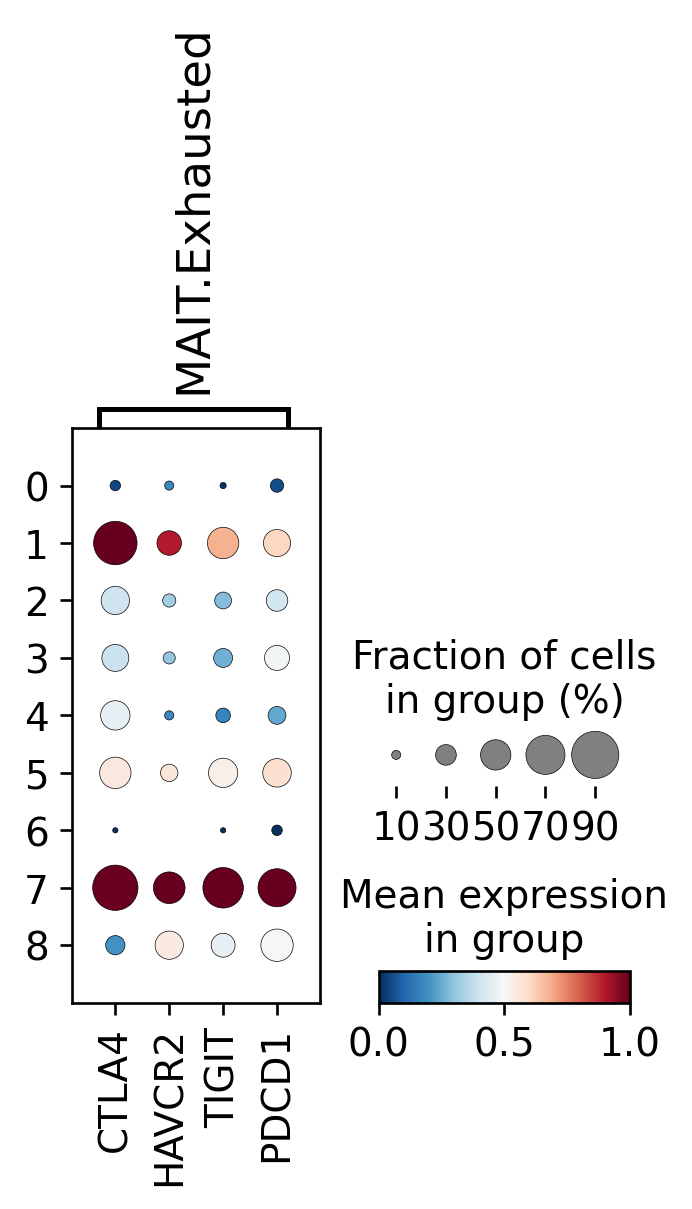

In [44]:
#sc.tl.dendrogram(adata,groupby='T/NK_celltype')
sc.pl.dotplot(
    adata_MAIT,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

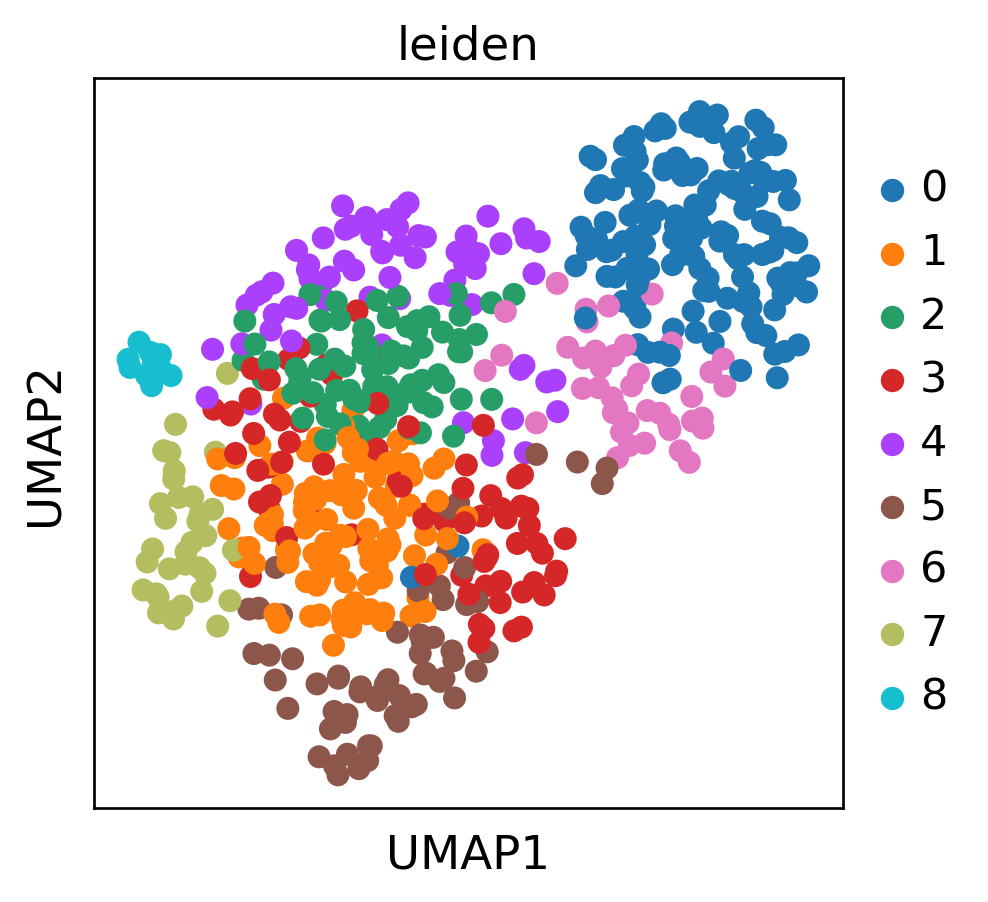

In [45]:
sc.pl.umap(adata_MAIT,color=['leiden'])

In [187]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '1': 'MAIT.Exhausted',
    '5': 'MAIT.Exhausted',
    '7': 'MAIT.Exhausted',
    '3': 'MAIT.Termination',
    '0': 'MAIT.Termination',
    '2': 'MAIT.Termination',
    '4': 'MAIT.Termination',
    '6': 'MAIT.Termination',
    '8': 'MAIT.Termination',
}
adata_MAIT.obs['T/NK_celltype'] = adata_MAIT.obs['leiden'].map(cluster2annotation).astype('category')

In [188]:
adata_MAIT

AnnData object with n_obs × n_vars = 630 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type', 'PRDM1(+)'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [189]:
adata_MAIT.uns['T/NK_celltype_colors']=[sc_color_Tcell[8],sc_color_Tcell[11]]

In [190]:
sc_color_Tcell

['#8A29E3',
 '#9B1A83',
 '#C453A4',
 '#C67BAE',
 '#E68BC3',
 '#DFEAF6',
 '#9DCBE3',
 '#4292C5',
 '#0A529B',
 '#F99FB5',
 '#BC7EBC',
 '#ACD2E7',
 '#F582BD',
 '#C4DDF1',
 '#366BAF']

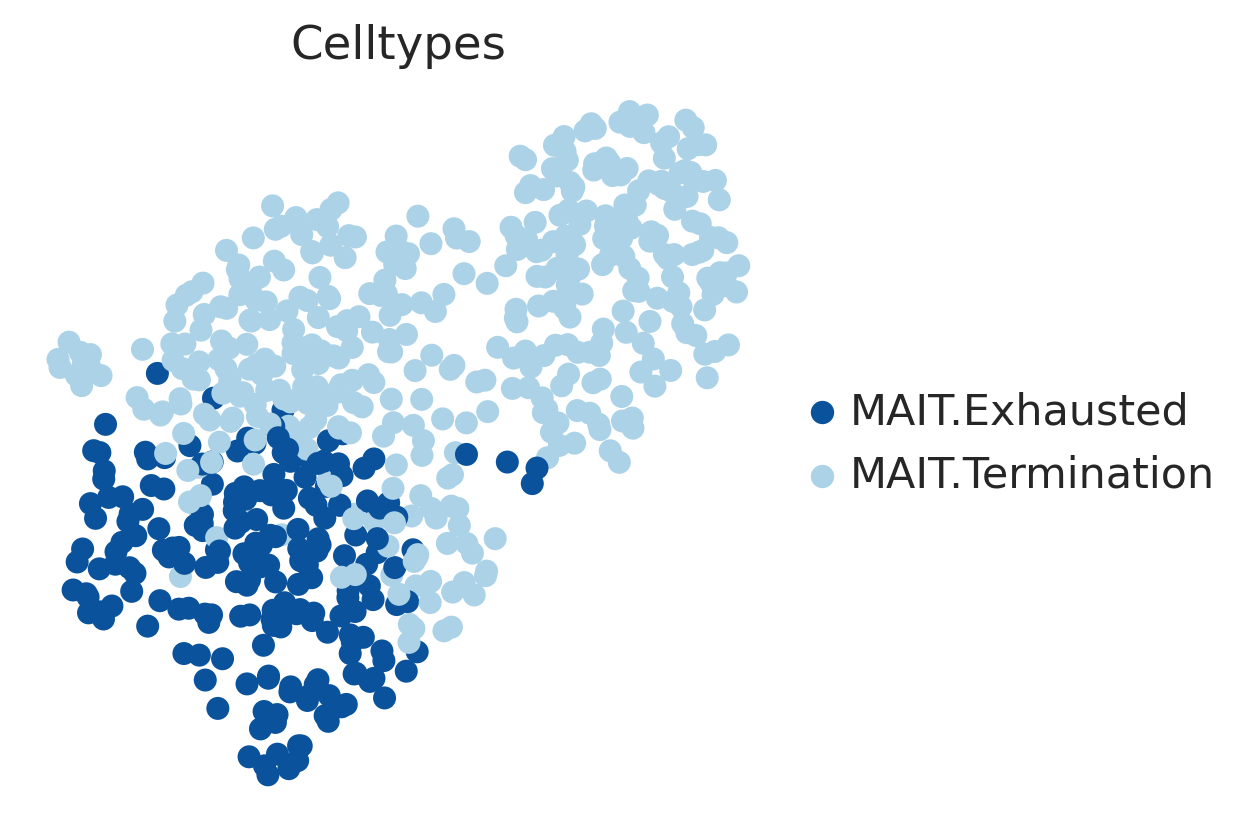

In [191]:
ax = sc.pl.embedding(
    adata_MAIT,
    basis="X_umap",
    color='T/NK_celltype',
    title='Celltypes',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


#plt.savefig("Figure3_MAIT.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_MAIT.png",dpi=300,bbox_inches = 'tight')

In [192]:
marker_genes_dict = {
    'MAIT.Exhausted':['CTLA4','HAVCR2','TIGIT','PDCD1'], 
}
# reference: https://www.jianshu.com/p/0c745b965620

{'mainplot_ax': <AxesSubplot: >,
 'gene_group_ax': <AxesSubplot: >,
 'size_legend_ax': <AxesSubplot: title={'center': 'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

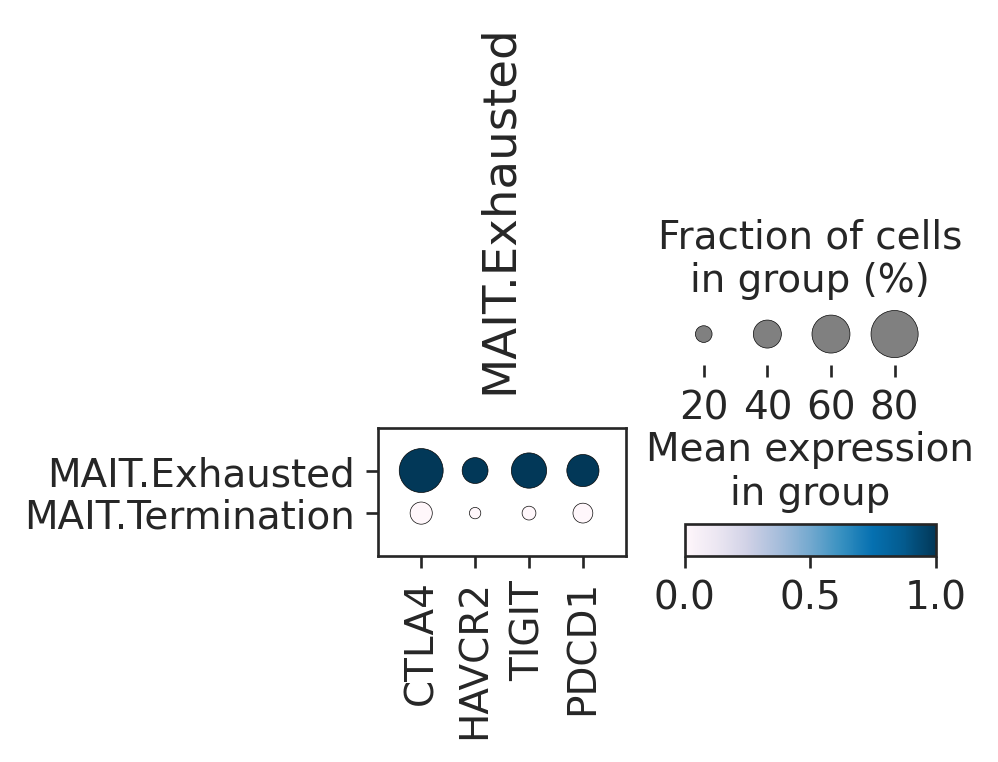

In [193]:

sc.pl.dotplot(
    adata_MAIT,
    marker_genes_dict,
    groupby='T/NK_celltype',
    dendrogram=False,
    color_map="PuBu",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, # 是否需要var
    show = False
      #  figsize=(4,2),

)
# 代码无效，记得修正
#plt.savefig("Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure1/Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')

## 可视化

In [194]:
marker_genes_dict = {
    'MAIT.Exhausted':['IL17A','IL17F','IL22','IL26'
    ,'TNF','GZMB','LAMP1','GZMA', # 这些基因提示MAIT激活,actually,提示cytoticxic effector function of MAIT cells
    
    ], 
}
# reference: https://www.jianshu.com/p/0c745b965620

In [195]:
Marker_genes =['KLRB1','ZBTB16','RORC','IL2RA','CD69','ICOS','CCR6','CD226','RORA'] # 相反，小鼠模型显示外周 MAIT 细胞具有天真和不成熟的表型，缺乏 ZBTB16，CD25，CD69或 ICOS 的表达
    
# reference: https://www.jianshu.com/p/0c745b965620

{'mainplot_ax': <AxesSubplot: >,
 'size_legend_ax': <AxesSubplot: title={'center': 'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

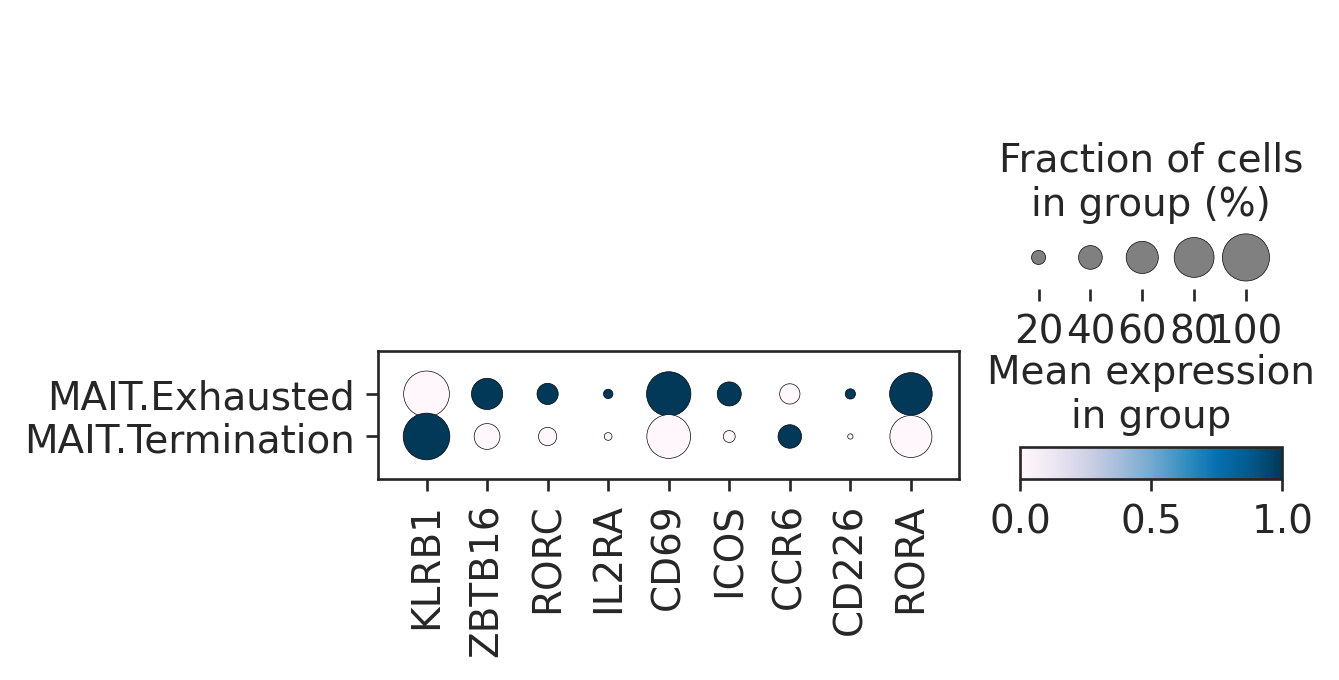

In [196]:
sc.pl.dotplot(
    adata_MAIT,
    Marker_genes,
    groupby='T/NK_celltype',
    dendrogram=False,
    color_map="PuBu",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, # 是否需要var
    show = False
      #  figsize=(4,2),

)
# 代码无效，记得修正
#plt.savefig("Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure1/Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')

In [197]:
activited_genes = ['TNF','IFNG','IL17A','IL17F','IL22','IL26','CSF2','IL10','IL12A', #细胞因子
             'LIF','HIVEP3','CBFB']#活化显著标志
# reference: https://www.jianshu.com/p/0c745b965620

{'mainplot_ax': <AxesSubplot: >,
 'size_legend_ax': <AxesSubplot: title={'center': 'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot: title={'center': 'Mean expression\nin group'}>}

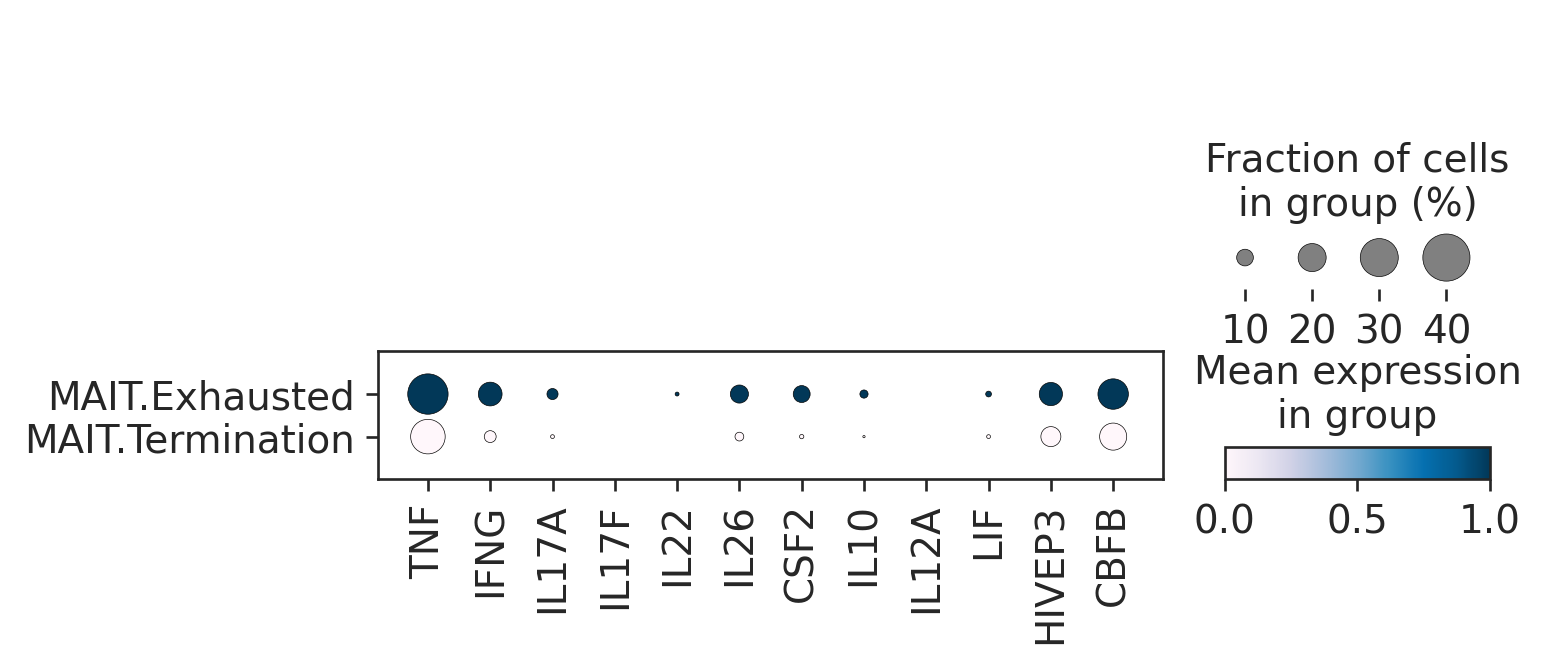

In [198]:
sc.pl.dotplot(
    adata_MAIT,
    activited_genes,
    groupby='T/NK_celltype',
    dendrogram=False,
    color_map="PuBu",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, # 是否需要var
    show = False
      #  figsize=(4,2),

)
# 代码无效，记得修正
#plt.savefig("Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure1/Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')


1.   经过激动性刺激后，MAIT 细胞迅速产生各种细胞因子和趋化因子，如 TNF-α，IFN-γ，IL-17，GM-CSF，IL-10，TGF-β，CCL3，CCL4和 CXCL16('TNF','IFNG','IL17A','IL17F','IL22','IL26','CSF2','IL10','TGFB1','CCL3','CCL4','CXCL16')，这些细胞因子和趋化因子可以调节先天性和后天免疫系统，以及组织修复 （Differential controls of MAIT cell effector polarization by mTORC1/mTORC2 via integrating cytokine and costimulatory signals）

2.   小鼠模型显示外周 MAIT 细胞具有天真和不成熟的表型，缺乏 ZBTB16，CD25，CD69或 ICOS 的表达（https://www.frontiersin.org/articles/10.3389/fimmu.2014.00450/full）

3.   人类和小鼠MAIT细胞活化的另一个新的显著特征是IL-6家族细胞因子白血病抑制因子（LIF）的显著表达。与我们对MAIT细胞组织修复特征的发现一致，LIF已被发现在小鼠肺炎模型中保护上皮免受损伤（Quinton等人，2012）。LIF在肺炎期间被显著诱导，可以减少肺上皮细胞死亡，促进肺再生和修复所必需的组织保护基因的表达，并提高粘膜屏障的完整性。（Activation and In Vivo Evolution of the MAIT Cell
Transcriptome in Mice and Humans Reveals Tissue
Repair Functionality,https://www.cell.com/cell-reports/fulltext/S2211-1247(19)31102-7?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2211124719311027%3Fshowall%3Dtrue）

4.尽管 MAIT 细胞具有细胞毒活性37和快速产生促炎细胞因子(包括 IL-17A，TNF 和 IFN-γ10)的能力，但 MAIT 细胞对军团菌感染的保护作用不依赖于 TNF 或 IL-17A，而是依赖于 MAIT 细胞分泌 IFN-γ 和 GM-CSF 的能力。这与一项关于弗朗西斯氏菌感染的研究一致[38] ，其中 GM-CSF 在感染后期减少了细菌负荷，尽管这并没有转化为显着的生存差异。

5.Cbf-β 是小鼠粘膜相关不变性 T 细胞发育、分化和功能所必需的
https://www.nature.com/articles/s41423-022-00920-y







# 转录因子调控网络

In [199]:
auc_adata=sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_TF.h5ad')
auc_adata

AnnData object with n_obs × n_vars = 12878 × 449
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'

In [200]:
auc_adata.obs['T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2                      CD8.T.MAIT
AAACGGGAGGCGCTCT-1-HP_POS_2    CD8.T.Tissue_Resident_Memory
AAACGGGTCGATAGAA-1-HP_POS_2                  NK.CD56_bright
AAAGATGAGGCATGGT-1-HP_POS_2                 CD8.T.Exhausted
AAAGATGCAGGCTCAC-1-HP_POS_2                  NK.CD56_bright
                                           ...             
TTCGAAGCACTCAGGC-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTCTTAGTCAACCATG-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTGCCGTAGAATTCCC-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTGCGTCGTTCGCTAA-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTGGCAATCTGCGGCA-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
Name: T/NK_celltype, Length: 12878, dtype: category
Categories (10, object): ['CD4.T.Follicular_Helper', 'CD4.T.Naive', 'CD4.T.Reg',
                          'CD4.T.Tissue_Resident_Memory', ..., 'CD8.T.Exhausted', 'CD8.T.MAIT',
                          'CD8.T.Tissue_Resident_Memory', 'NK.CD56_bright']

In [201]:
auc_adata_MAIT = auc_adata[adata_MAIT.obs.index]
auc_adata_MAIT.obs = adata_MAIT.obs
auc_adata_MAIT.obsm = adata_MAIT.obsm
auc_adata_MAIT

AnnData object with n_obs × n_vars = 630 × 449
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type', 'PRDM1(+)'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'

In [202]:
auc_adata_MAIT.obs['T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2      MAIT.Exhausted
AAATGCCAGTGGTAAT-1-HP_POS_2      MAIT.Exhausted
ACAGCCGGTAGCGTAG-1-HP_POS_2    MAIT.Termination
ACAGCTAGTTGATTCG-1-HP_POS_2    MAIT.Termination
ACATGGTCAGGAATCG-1-HP_POS_2      MAIT.Exhausted
                                     ...       
TAAGAGAGTGTGCCTG-1-HP_POS_7    MAIT.Termination
TACGGTATCCGTTGTC-1-HP_POS_7    MAIT.Termination
TGACTAGTCAGGTAAA-1-HP_POS_7    MAIT.Termination
TTCTTAGTCATGCTCC-1-HP_POS_7      MAIT.Exhausted
TTTCCTCCAATAGCGG-1-HP_POS_7      MAIT.Exhausted
Name: T/NK_celltype, Length: 630, dtype: category
Categories (2, object): ['MAIT.Exhausted', 'MAIT.Termination']

In [203]:
auc_adata_MAIT.obs.drop(['PRDM1(+)'],axis=1,inplace=True)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


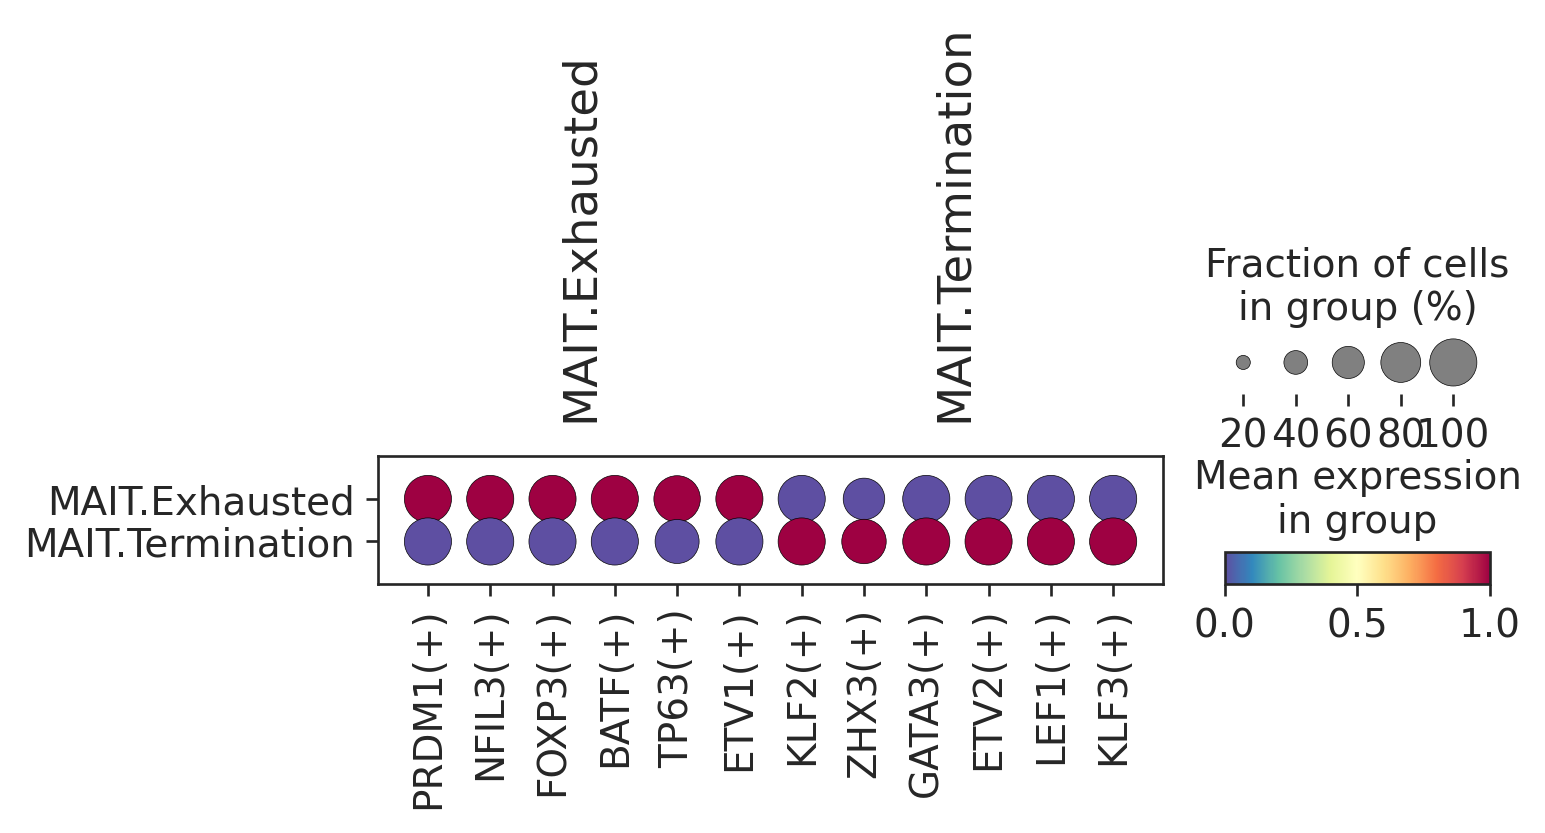

In [204]:
sc.tl.rank_genes_groups(auc_adata_MAIT, 'T/NK_celltype', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(auc_adata_MAIT,groupby='T/NK_celltype',dendrogram=False,
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=6)

## 箱线图（PRDM1）

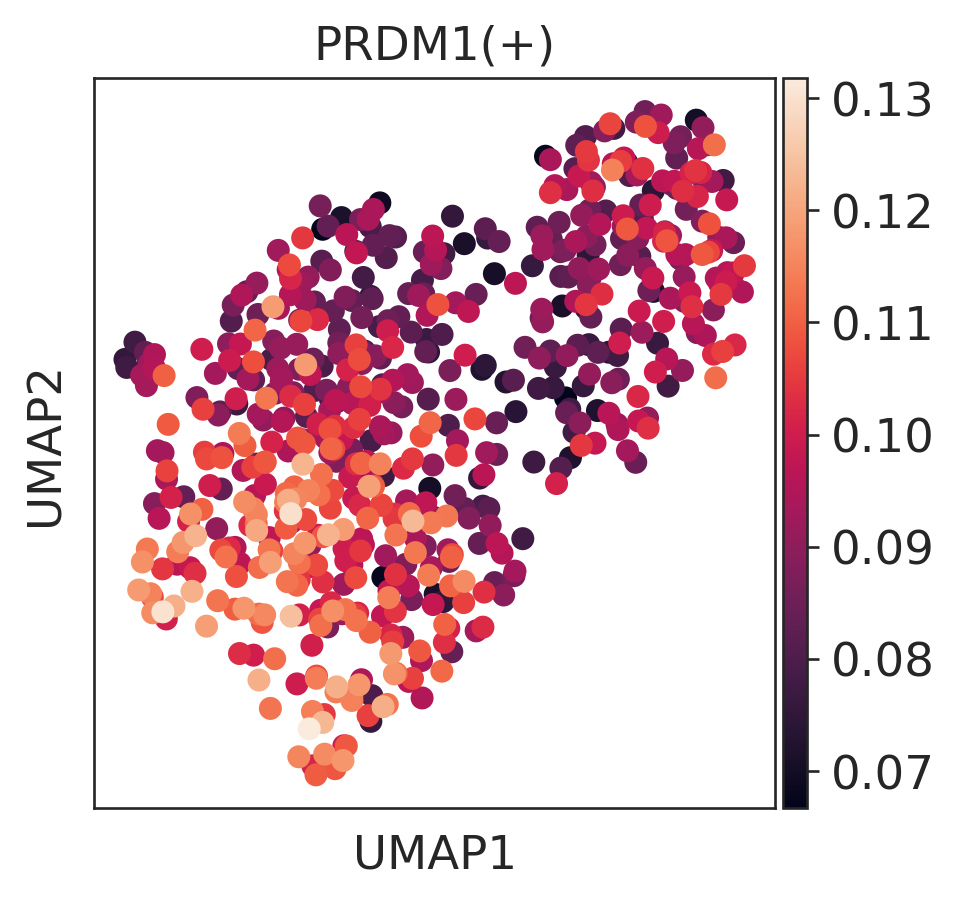

In [205]:
sc.pl.umap(auc_adata_MAIT,color='PRDM1(+)')

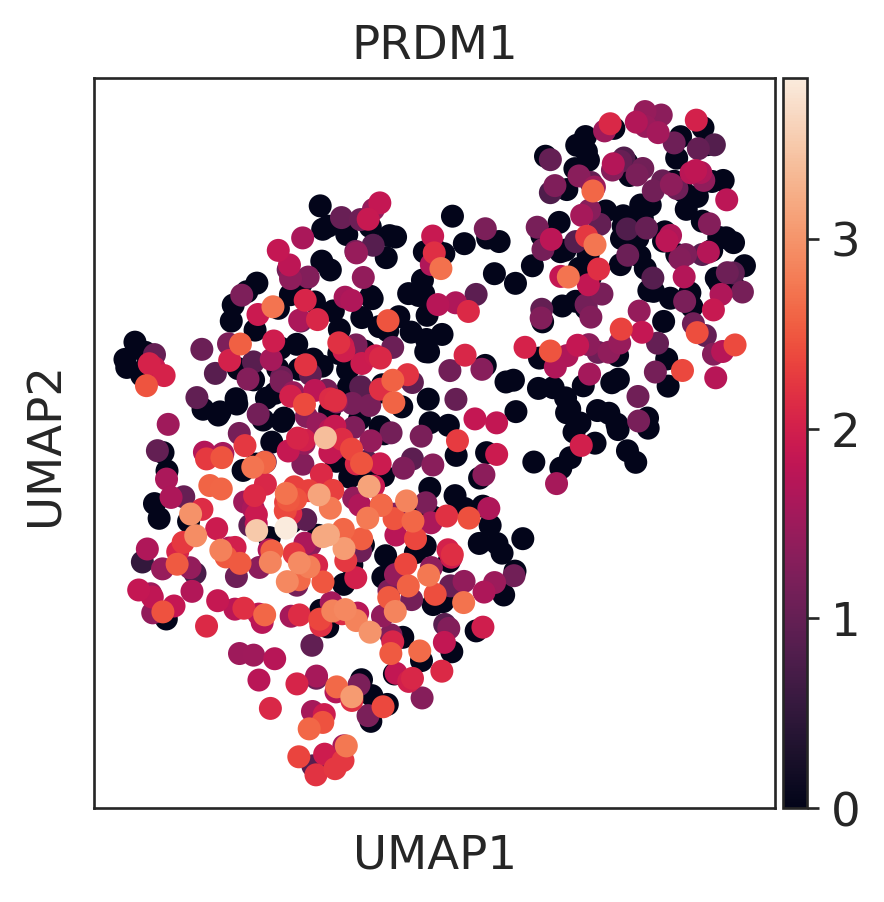

In [206]:
sc.pl.umap(adata_MAIT,color='PRDM1')

In [207]:
auc_adata_MAIT.obs['PRDM1(+)'] = ''
auc_adata_MAIT.obs['PRDM1(+)'] = auc_adata_MAIT.to_df().loc[:,'PRDM1(+)']
auc_adata_MAIT.obs

Person Sample  n_genes  doublet_score  \
AAACCTGTCTAACTTC-1-HP_POS_2  HP_POS_2    POS     3252       0.015161   
AAATGCCAGTGGTAAT-1-HP_POS_2  HP_POS_2    POS     2181       0.034524   
ACAGCCGGTAGCGTAG-1-HP_POS_2  HP_POS_2    POS     3063       0.010471   
ACAGCTAGTTGATTCG-1-HP_POS_2  HP_POS_2    POS     2771       0.011914   
ACATGGTCAGGAATCG-1-HP_POS_2  HP_POS_2    POS     1928       0.025766   
...                               ...    ...      ...            ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7  HP_POS_7    POS     1333       0.035212   
TACGGTATCCGTTGTC-1-HP_POS_7  HP_POS_7    POS      899       0.013919   
TGACTAGTCAGGTAAA-1-HP_POS_7  HP_POS_7    POS     1377       0.028672   
TTCTTAGTCATGCTCC-1-HP_POS_7  HP_POS_7    POS     1765       0.024783   
TTTCCTCCAATAGCGG-1-HP_POS_7  HP_POS_7    POS     1228       0.033851   

                             predicted_doublet  n_genes_by_counts  \
AAACCTGTCTAACTTC-1-HP_POS_2              False               3252   
AAATGCCAGTGGTAAT-1-HP_POS_2              False               2181   
ACAGCCGGTAGCGTAG-1-HP_POS_2              False               3063   
ACAGCTAGTTGATTCG-1-HP_POS_2              False               2771   
ACATGGTCAGGAATCG-1-HP_POS_2              False               1928   
...                                        ...                ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7              False               1333   
TACGGTATCCGTTGTC-1-HP_POS_7              False                899   
TGACTAGTCAGGTAAA-1-HP_POS_7              False               1377   
TTCTTAGTCATGCTCC-1-HP_POS_7              False               1765   
TTTCCTCCAATAGCGG-1-HP_POS_7              False               1228   

                             total_counts  total_counts_mt  pct_counts_mt  \
AAACCTGTCTAACTTC-1-HP_POS_2       10150.0            451.0       4.443350   
AAATGCCAGTGGTAAT-1-HP_POS_2        5204.0            756.0      14.527287   
ACAGCCGGTAGCGTAG-1-HP_POS_2        8388.0            311.0       3.707678   
ACAGCTAGTTGATTCG-1-HP_POS_2        8016.0            416.0       5.189620   
ACATGGTCAGGAATCG-1-HP_POS_2        4229.0            434.0      10.262474   
...                                   ...              ...            ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7        2905.0            162.0       5.576592   
TACGGTATCCGTTGTC-1-HP_POS_7        1885.0             68.0       3.607427   
TGACTAGTCAGGTAAA-1-HP_POS_7        3225.0             88.0       2.728682   
TTCTTAGTCATGCTCC-1-HP_POS_7        3773.0            164.0       4.346673   
TTTCCTCCAATAGCGG-1-HP_POS_7        2652.0             73.0       2.752640   

                             _scvi_batch  _scvi_labels leiden major_celltype  \
AAACCTGTCTAACTTC-1-HP_POS_2            1             0      5      NK/T cell   
AAATGCCAGTGGTAAT-1-HP_POS_2            1             0      5      NK/T cell   
ACAGCCGGTAGCGTAG-1-HP_POS_2            1             0      3      NK/T cell   
ACAGCTAGTTGATTCG-1-HP_POS_2            1             0      0      NK/T cell   
ACATGGTCAGGAATCG-1-HP_POS_2            1             0      1      NK/T cell   
...                                  ...           ...    ...            ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7            6             0      3      NK/T cell   
TACGGTATCCGTTGTC-1-HP_POS_7            6             0      6      NK/T cell   
TGACTAGTCAGGTAAA-1-HP_POS_7            6             0      4      NK/T cell   
TTCTTAGTCATGCTCC-1-HP_POS_7            6             0      5      NK/T cell   
TTTCCTCCAATAGCGG-1-HP_POS_7            6             0      5      NK/T cell   

                                T/NK_celltype T/NK_type  PRDM1(+)  
AAACCTGTCTAACTTC-1-HP_POS_2    MAIT.Exhausted       CD8  0.131763  
AAATGCCAGTGGTAAT-1-HP_POS_2    MAIT.Exhausted       CD8  0.107554  
ACAGCCGGTAGCGTAG-1-HP_POS_2  MAIT.Termination       CD8  0.129815  
ACAGCTAGTTGATTCG-1-HP_POS_2  MAIT.Termination       CD8  0.101998  
ACATGGTCAGGAATCG-1-HP_POS_2    MAIT.Exhausted       CD8  0.112944  
...                                       .

In [208]:
auc_adata_MAIT.obs['PRDM1(+)'] = (auc_adata_MAIT.obs['PRDM1(+)']-auc_adata_MAIT.obs['PRDM1(+)'].min()) / (auc_adata_MAIT.obs['PRDM1(+)'].max()-auc_adata_MAIT.obs['PRDM1(+)'].min())
auc_adata_MAIT.obs['PRDM1(+)'] 

AAACCTGTCTAACTTC-1-HP_POS_2    1.000000
AAATGCCAGTGGTAAT-1-HP_POS_2    0.627892
ACAGCCGGTAGCGTAG-1-HP_POS_2    0.970065
ACAGCTAGTTGATTCG-1-HP_POS_2    0.542490
ACATGGTCAGGAATCG-1-HP_POS_2    0.710739
                                 ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7    0.267930
TACGGTATCCGTTGTC-1-HP_POS_7    0.269482
TGACTAGTCAGGTAAA-1-HP_POS_7    0.177779
TTCTTAGTCATGCTCC-1-HP_POS_7    0.441336
TTTCCTCCAATAGCGG-1-HP_POS_7    0.199831
Name: PRDM1(+), Length: 630, dtype: float32

In [209]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [210]:
import random
import matplotlib.patches as mpatches

data = auc_adata_MAIT.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='PRDM1(+)'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

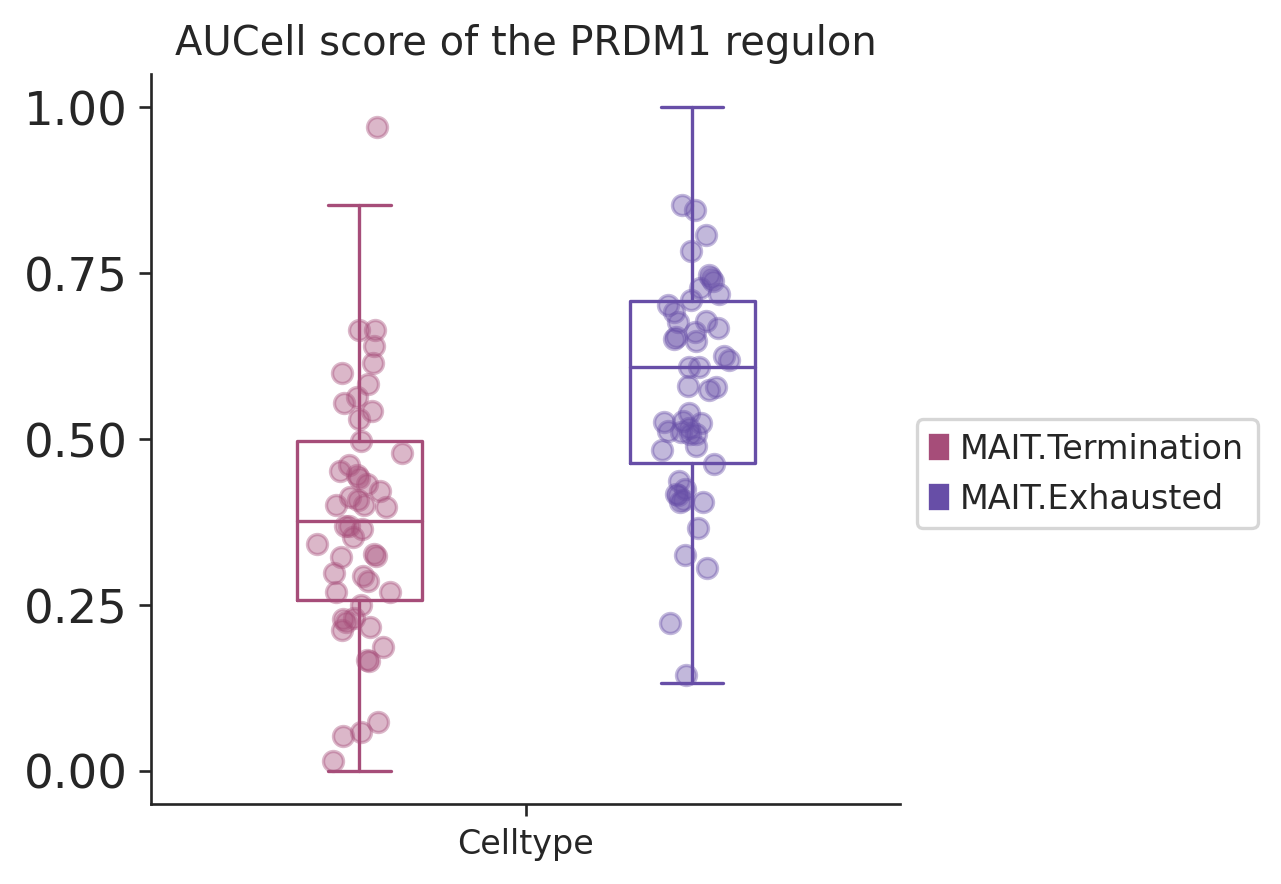

In [211]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#a64d79','#674ea7']
#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data][0], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
#ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)

y = np.arange(0, 1.25, 0.25) # 手动设置坐标
plt.yticks(y)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('AUCell score of the PRDM1 regulon',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#fig.savefig(current_path+"figures/fig_boxplot.png",dpi=300,bbox_inches = 'tight')

# 

## 箱线图（KLF2） 静止型T细胞关键转录因子

静止T细胞高表达DNA结合蛋白KLF2，使其成为T细胞静止的标记物。KLF2部分通过抑制转录因子MYC和通过p21影响细胞周期进程，维持T细胞静止。KLF2的表达是由转录因子FOXO1诱导和维持的，FOXO1在维持T细胞静止方面具有公认的作用。

此外，抑制性检查点受体VISTA的表达似乎对原始T细胞维持静止状态至关重要。研究表明，VISTA−T细胞表达的重要静止效应分子水平降低，如KLF2、BTG1和BTG2。

In [212]:
auc_adata_MAIT.obs.drop(['PRDM1(+)'],axis=1,inplace=True)

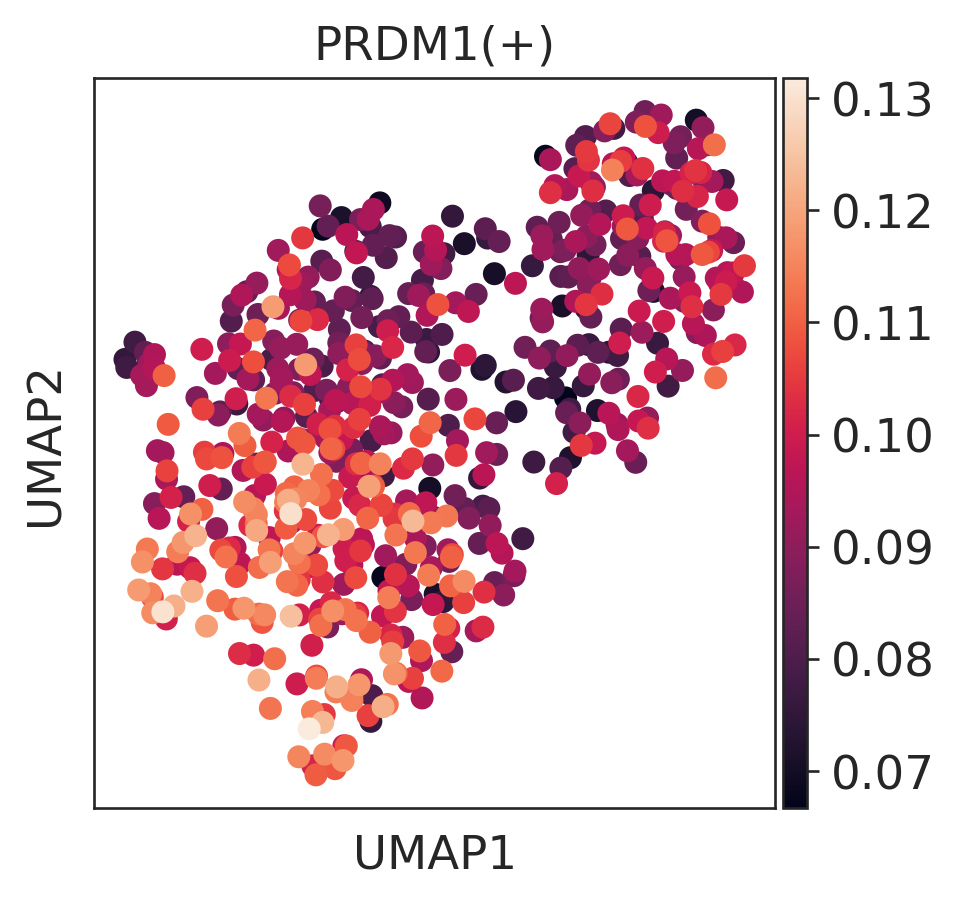

In [213]:
sc.pl.umap(auc_adata_MAIT,color='PRDM1(+)')

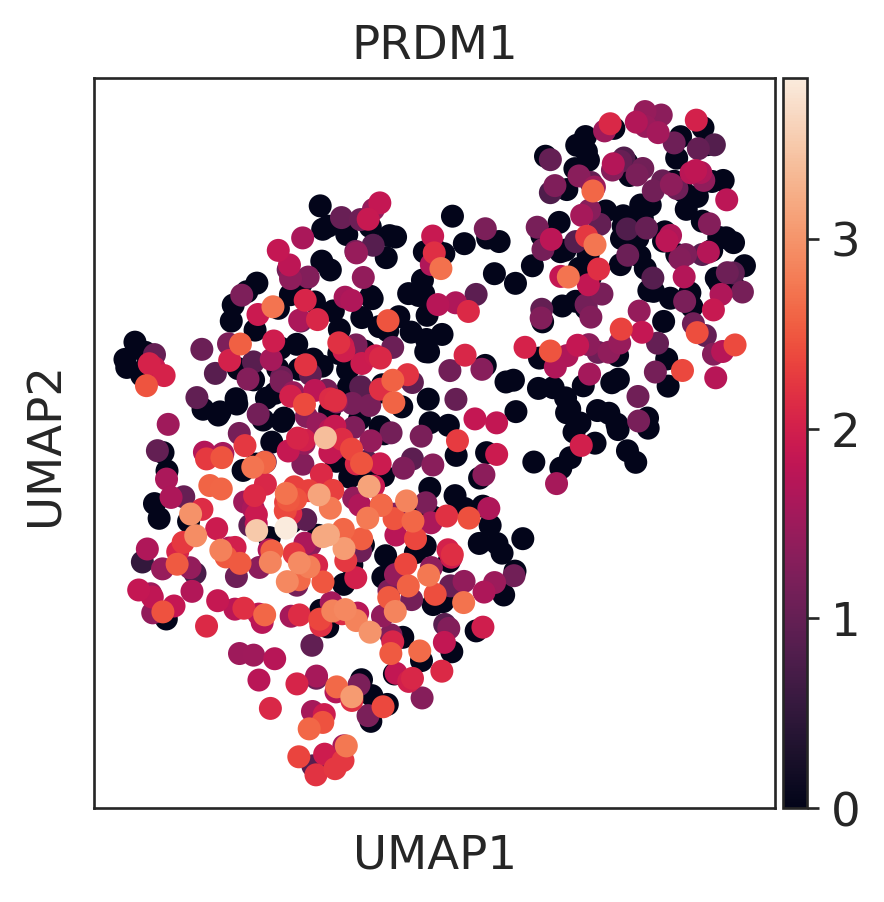

In [214]:
sc.pl.umap(adata_MAIT,color='PRDM1')

In [215]:
auc_adata_MAIT.obs['PRDM1(+)'] = ''
auc_adata_MAIT.obs['PRDM1(+)'] = auc_adata_MAIT.to_df().loc[:,'PRDM1(+)']
auc_adata_MAIT.obs

Person Sample  n_genes  doublet_score  \
AAACCTGTCTAACTTC-1-HP_POS_2  HP_POS_2    POS     3252       0.015161   
AAATGCCAGTGGTAAT-1-HP_POS_2  HP_POS_2    POS     2181       0.034524   
ACAGCCGGTAGCGTAG-1-HP_POS_2  HP_POS_2    POS     3063       0.010471   
ACAGCTAGTTGATTCG-1-HP_POS_2  HP_POS_2    POS     2771       0.011914   
ACATGGTCAGGAATCG-1-HP_POS_2  HP_POS_2    POS     1928       0.025766   
...                               ...    ...      ...            ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7  HP_POS_7    POS     1333       0.035212   
TACGGTATCCGTTGTC-1-HP_POS_7  HP_POS_7    POS      899       0.013919   
TGACTAGTCAGGTAAA-1-HP_POS_7  HP_POS_7    POS     1377       0.028672   
TTCTTAGTCATGCTCC-1-HP_POS_7  HP_POS_7    POS     1765       0.024783   
TTTCCTCCAATAGCGG-1-HP_POS_7  HP_POS_7    POS     1228       0.033851   

                             predicted_doublet  n_genes_by_counts  \
AAACCTGTCTAACTTC-1-HP_POS_2              False               3252   
AAATGCCAGTGGTAAT-1-HP_POS_2              False               2181   
ACAGCCGGTAGCGTAG-1-HP_POS_2              False               3063   
ACAGCTAGTTGATTCG-1-HP_POS_2              False               2771   
ACATGGTCAGGAATCG-1-HP_POS_2              False               1928   
...                                        ...                ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7              False               1333   
TACGGTATCCGTTGTC-1-HP_POS_7              False                899   
TGACTAGTCAGGTAAA-1-HP_POS_7              False               1377   
TTCTTAGTCATGCTCC-1-HP_POS_7              False               1765   
TTTCCTCCAATAGCGG-1-HP_POS_7              False               1228   

                             total_counts  total_counts_mt  pct_counts_mt  \
AAACCTGTCTAACTTC-1-HP_POS_2       10150.0            451.0       4.443350   
AAATGCCAGTGGTAAT-1-HP_POS_2        5204.0            756.0      14.527287   
ACAGCCGGTAGCGTAG-1-HP_POS_2        8388.0            311.0       3.707678   
ACAGCTAGTTGATTCG-1-HP_POS_2        8016.0            416.0       5.189620   
ACATGGTCAGGAATCG-1-HP_POS_2        4229.0            434.0      10.262474   
...                                   ...              ...            ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7        2905.0            162.0       5.576592   
TACGGTATCCGTTGTC-1-HP_POS_7        1885.0             68.0       3.607427   
TGACTAGTCAGGTAAA-1-HP_POS_7        3225.0             88.0       2.728682   
TTCTTAGTCATGCTCC-1-HP_POS_7        3773.0            164.0       4.346673   
TTTCCTCCAATAGCGG-1-HP_POS_7        2652.0             73.0       2.752640   

                             _scvi_batch  _scvi_labels leiden major_celltype  \
AAACCTGTCTAACTTC-1-HP_POS_2            1             0      5      NK/T cell   
AAATGCCAGTGGTAAT-1-HP_POS_2            1             0      5      NK/T cell   
ACAGCCGGTAGCGTAG-1-HP_POS_2            1             0      3      NK/T cell   
ACAGCTAGTTGATTCG-1-HP_POS_2            1             0      0      NK/T cell   
ACATGGTCAGGAATCG-1-HP_POS_2            1             0      1      NK/T cell   
...                                  ...           ...    ...            ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7            6             0      3      NK/T cell   
TACGGTATCCGTTGTC-1-HP_POS_7            6             0      6      NK/T cell   
TGACTAGTCAGGTAAA-1-HP_POS_7            6             0      4      NK/T cell   
TTCTTAGTCATGCTCC-1-HP_POS_7            6             0      5      NK/T cell   
TTTCCTCCAATAGCGG-1-HP_POS_7            6             0      5      NK/T cell   

                                T/NK_celltype T/NK_type  PRDM1(+)  
AAACCTGTCTAACTTC-1-HP_POS_2    MAIT.Exhausted       CD8  0.131763  
AAATGCCAGTGGTAAT-1-HP_POS_2    MAIT.Exhausted       CD8  0.107554  
ACAGCCGGTAGCGTAG-1-HP_POS_2  MAIT.Termination       CD8  0.129815  
ACAGCTAGTTGATTCG-1-HP_POS_2  MAIT.Termination       CD8  0.101998  
ACATGGTCAGGAATCG-1-HP_POS_2    MAIT.Exhausted       CD8  0.112944  
...                                       .

In [216]:
auc_adata_MAIT.obs['PRDM1(+)'] = (auc_adata_MAIT.obs['PRDM1(+)']-auc_adata_MAIT.obs['PRDM1(+)'].min()) / (auc_adata_MAIT.obs['PRDM1(+)'].max()-auc_adata_MAIT.obs['PRDM1(+)'].min())
auc_adata_MAIT.obs['PRDM1(+)'] 

AAACCTGTCTAACTTC-1-HP_POS_2    1.000000
AAATGCCAGTGGTAAT-1-HP_POS_2    0.627892
ACAGCCGGTAGCGTAG-1-HP_POS_2    0.970065
ACAGCTAGTTGATTCG-1-HP_POS_2    0.542490
ACATGGTCAGGAATCG-1-HP_POS_2    0.710739
                                 ...   
TAAGAGAGTGTGCCTG-1-HP_POS_7    0.267930
TACGGTATCCGTTGTC-1-HP_POS_7    0.269482
TGACTAGTCAGGTAAA-1-HP_POS_7    0.177779
TTCTTAGTCATGCTCC-1-HP_POS_7    0.441336
TTTCCTCCAATAGCGG-1-HP_POS_7    0.199831
Name: PRDM1(+), Length: 630, dtype: float32

In [217]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [218]:
import random
import matplotlib.patches as mpatches

data = auc_adata_MAIT.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='PRDM1(+)'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

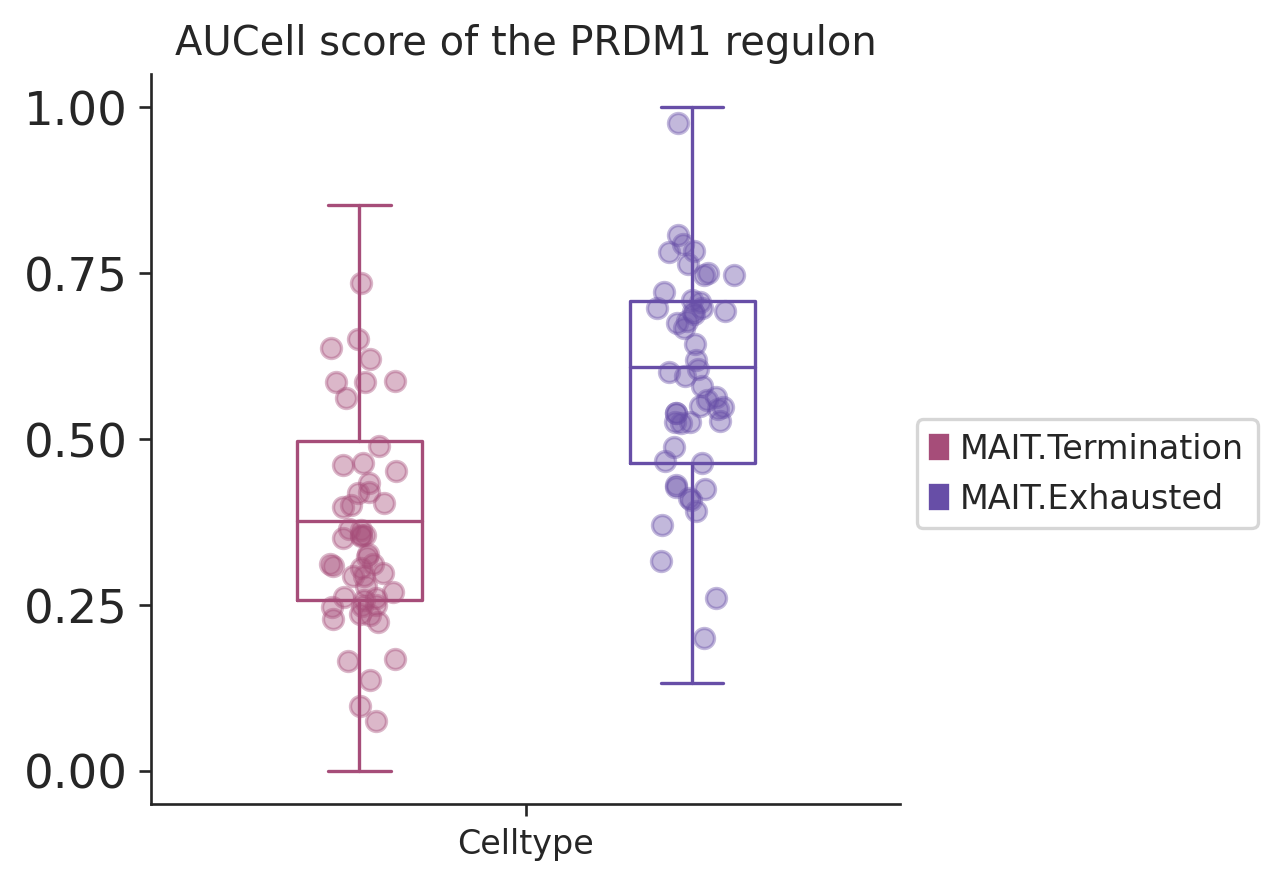

In [219]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#a64d79','#674ea7']
#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data][0], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
#ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)

y = np.arange(0, 1.25, 0.25) # 手动设置坐标
plt.yticks(y)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('AUCell score of the PRDM1 regulon',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#fig.savefig(current_path+"figures/fig_boxplot.png",dpi=300,bbox_inches = 'tight')

# Decoupler 单细胞层面GO富集分析

In [220]:
Go_result = sc.read_h5ad('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_T_Go_Result.h5ad')

In [221]:
Go_result = Go_result[adata_MAIT.obs.index]
Go_result

View of AnnData object with n_obs × n_vars = 630 × 7343
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'

In [222]:
adata_MAIT

AnnData object with n_obs × n_vars = 630 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type', 'PRDM1(+)'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [223]:
Go_result

View of AnnData object with n_obs × n_vars = 630 × 7343
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'

In [224]:
Go_result.obs.loc[:,'T/NK_celltype'] = adata_MAIT.obs['T/NK_celltype']
Go_result.obs.loc[:,'T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2      MAIT.Exhausted
AAATGCCAGTGGTAAT-1-HP_POS_2      MAIT.Exhausted
ACAGCCGGTAGCGTAG-1-HP_POS_2    MAIT.Termination
ACAGCTAGTTGATTCG-1-HP_POS_2    MAIT.Termination
ACATGGTCAGGAATCG-1-HP_POS_2      MAIT.Exhausted
                                     ...       
TAAGAGAGTGTGCCTG-1-HP_POS_7    MAIT.Termination
TACGGTATCCGTTGTC-1-HP_POS_7    MAIT.Termination
TGACTAGTCAGGTAAA-1-HP_POS_7    MAIT.Termination
TTCTTAGTCATGCTCC-1-HP_POS_7      MAIT.Exhausted
TTTCCTCCAATAGCGG-1-HP_POS_7      MAIT.Exhausted
Name: T/NK_celltype, Length: 630, dtype: category
Categories (2, object): ['MAIT.Exhausted', 'MAIT.Termination']

In [225]:
Go_result.uns['log1p']['base'] = None

In [226]:
Go_result

View of AnnData object with n_obs × n_vars = 630 × 7343
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


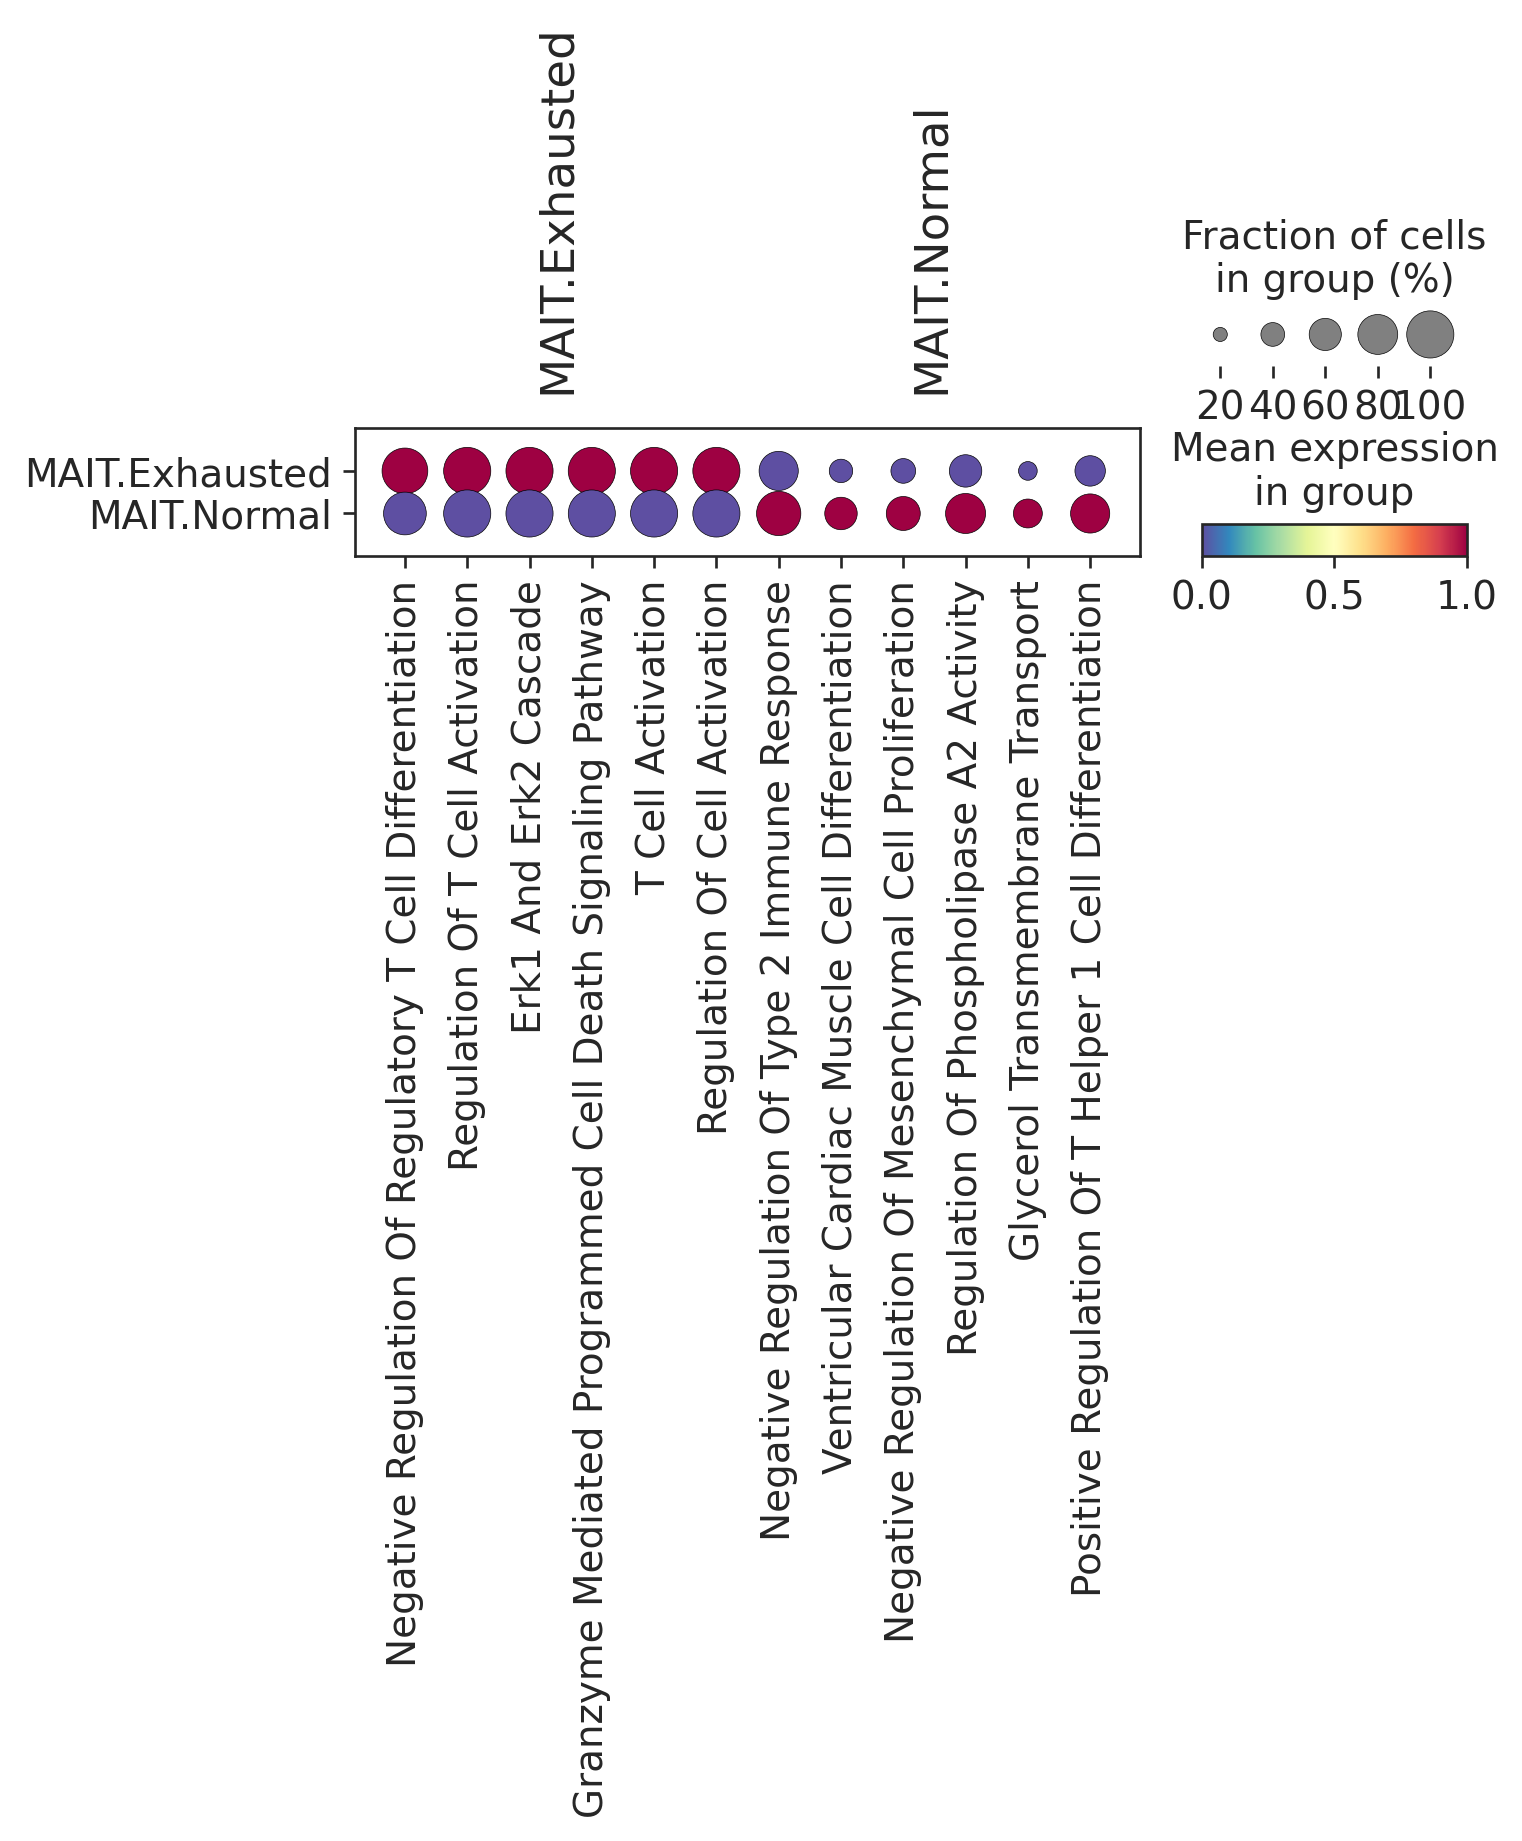

In [182]:
sc.tl.rank_genes_groups(Go_result, 'T/NK_celltype', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(Go_result,groupby='T/NK_celltype',dendrogram=False,
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=6)

In [183]:
index = ['Negative Regulation Of Regulatory T Cell Differentiation',
      'Regulation Of T Cell Activation',
      'Granzyme Mediated Programmed Cell Death Signaling Pathway',
      'Erk1 And Erk2 Cascade',
      'T Cell Activation','Regulation Of Cell Activation',
      'Negative Regulation Of Type 2 Immune Response',
      'Ventricular Cardiac Muscle Cell Differentiation',
      'Negative Regulation Of Mesenchymal Cell Proliferation',
      'Regulation Of Phospholipase A2 Activity',
      'Glycerol Transmembrane Transport',
      'Positive Regulation Of T Helper 1 Cell Differentiation']

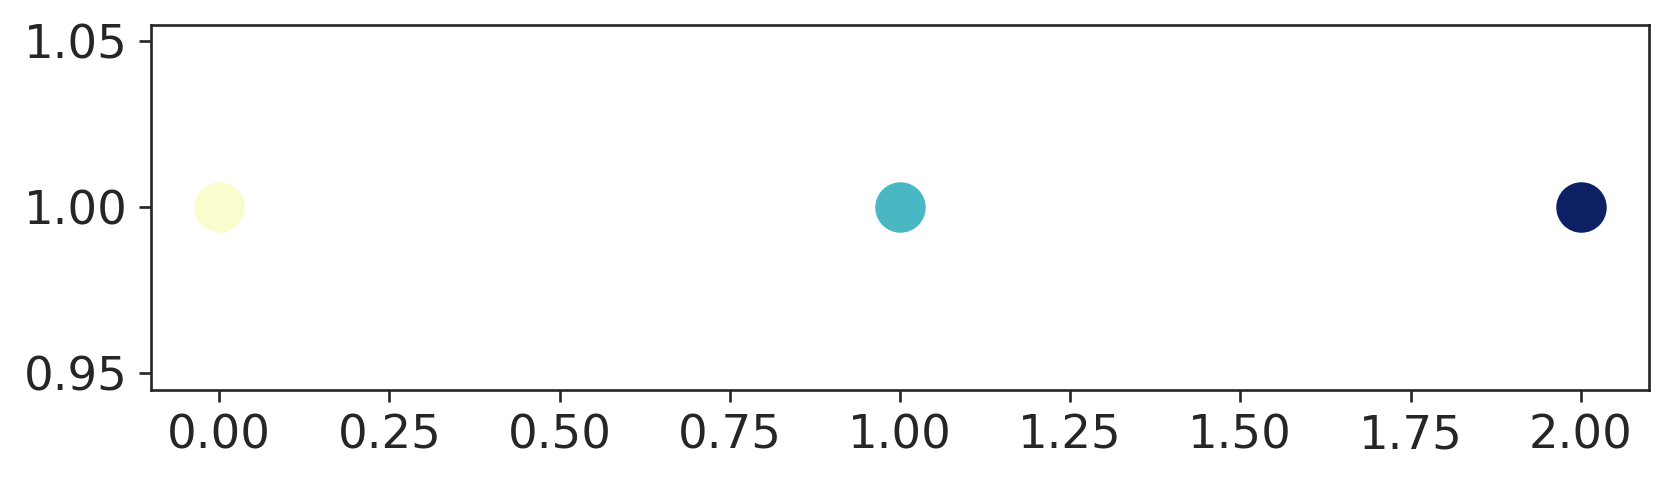

In [184]:

# 设置色卡
sc_color_Gene=['#FAFCCF', #浅色
        '#49B8C2', #中间
        '#0C2064', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
#         可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


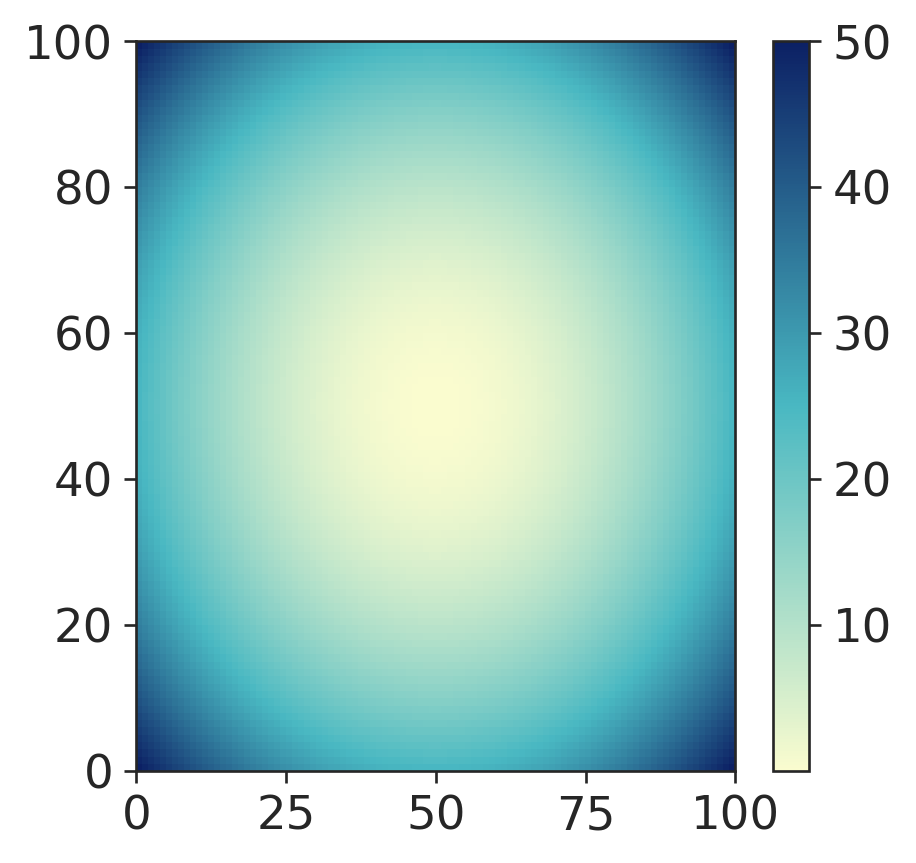

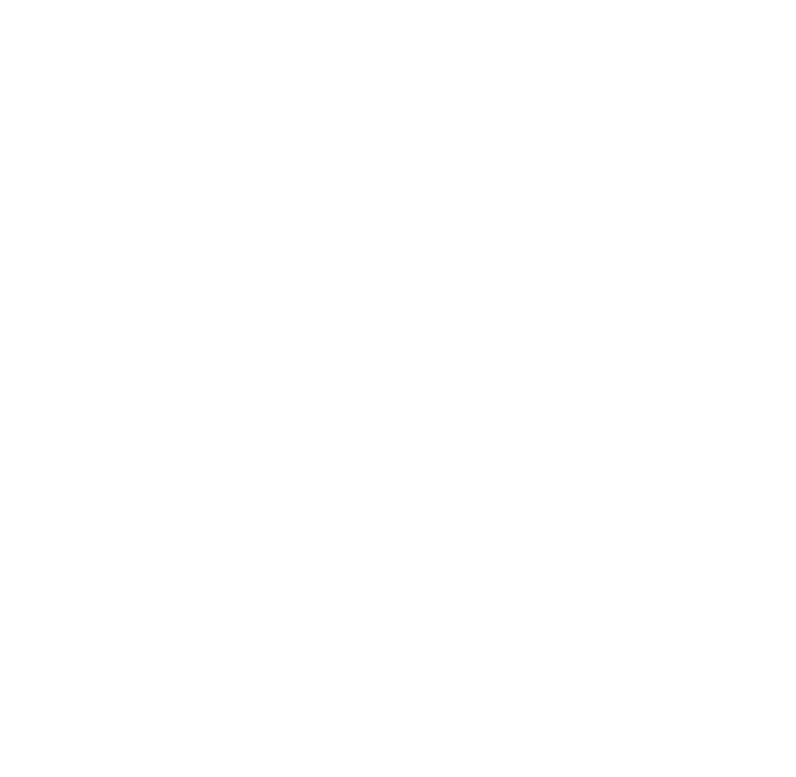

In [185]:
!pip install colormap
!pip install easydev
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_T/NK_celltype']`


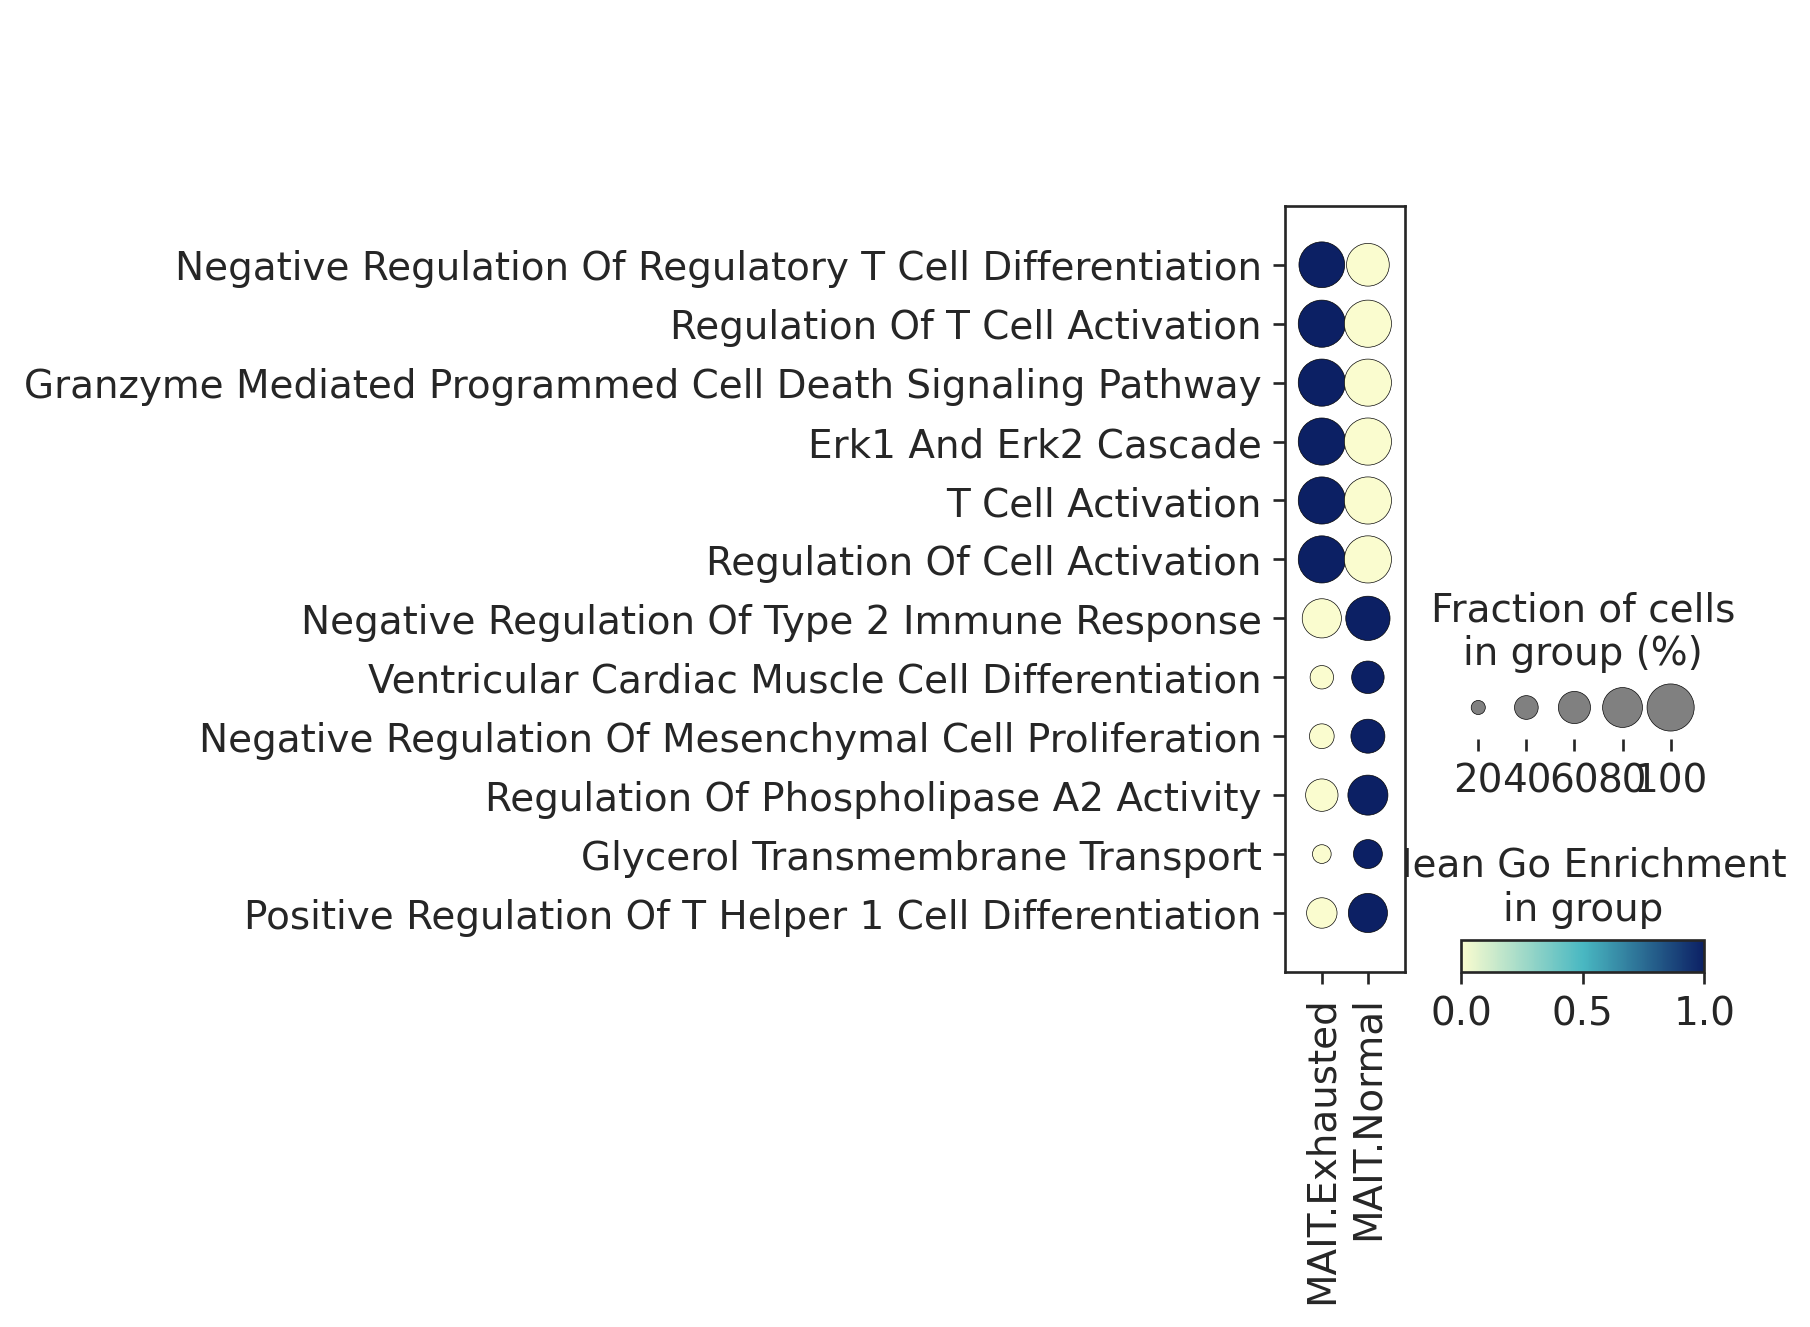

In [186]:
sc.tl.dendrogram(Go_result,groupby='T/NK_celltype')
ax = sc.pl.dotplot(Go_result, index,
              swap_axes=True,standard_scale='var', 
              groupby='T/NK_celltype', show=False, dendrogram=True,
              cmap = genecmap,
              colorbar_title='Mean Go Enrichment\nin group')
#plt.savefig("Figure2_GO.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure2_GO.png",dpi=300,bbox_inches = 'tight')